# Calculate Alignment Score

In [ ]:
# singleCellTools.basic.initLayer(ad, layer="raw")
# sc.pp.highly_variable_genes(
#     ad, layer="raw", n_top_genes=3000, flavor="seurat_v3", batch_key="batch_time"
# )
# ad.X = ad.layers["normalize_log"].copy()
# sc.tl.pca(ad)
bk = pw.Brick(figsize=(3, 3))
_, ax = singleCellTools.others.getAlignmentScore(
    ad, "Sample_4", obsm="X_pca", knn=15, vmin=0.4, vmax=1.0, ax=bk
)
plt.sca(ax)
plt.title("All cells")
plt.close()

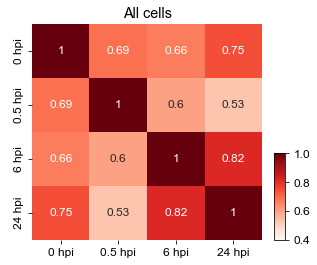

In [ ]:
ax.add_colorbar(vmin=0.4, cmap=plt.get_cmap("Reds")).savefig()

In [ ]:
lsBk = [ax]
for cluster, ad_cluster in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if not cluster in ['1 Epidermis', '3 Cortex']:
        continue
    singleCellTools.basic.initLayer(ad_cluster, layer='raw')
    ls_expressedGene = singleCellTools.basic.geneFilterSampleSeparately(ad_cluster, 'batch_time', layer='raw', minCells = 3)
    ad_cluster = ad_cluster[:, ls_expressedGene]
    sc.pp.highly_variable_genes(ad_cluster, layer='raw', n_top_genes=2000, flavor='seurat_v3', batch_key='batch_time')
    ad_cluster.X = ad_cluster.layers['normalize_log'].copy()
    sc.tl.pca(ad_cluster)
    bk = pw.Brick(figsize=(3,3))
    _, ax = singleCellTools.others.getAlignmentScore(ad_cluster, 'Sample_4', obsm = 'X_pca', knn=15, vmin = 0.4, vmax=1.0, ax=bk)
    plt.sca(ax)
    plt.title(cluster)
    lsBk.append(ax)
    plt.close()

  0%|          | 0/9 [00:00<?, ?it/s]

 22%|██▏       | 2/9 [00:19<00:59,  8.44s/it]

100%|██████████| 9/9 [01:01<00:00,  6.86s/it]


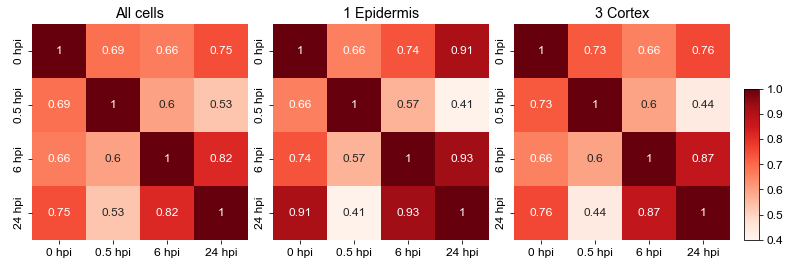

In [ ]:
pwStack(lsBk, ncols=4).add_colorbar(vmin=0.4, cmap=plt.get_cmap("Reds"), x = 1.02, hratio=0.7, ).savefig()

In [ ]:
lsBk = []
for cluster, ad_cluster in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if cluster == '9 Unknown':
        continue
    singleCellTools.basic.initLayer(ad_cluster, layer='raw')
    ls_expressedGene = singleCellTools.basic.geneFilterSampleSeparately(ad_cluster, 'batch_time', layer='raw', minCells = 3)
    ad_cluster = ad_cluster[:, ls_expressedGene]
    sc.pp.highly_variable_genes(ad_cluster, layer='raw', n_top_genes=2000, flavor='seurat_v3', batch_key='batch_time')
    ad_cluster.X = ad_cluster.layers['normalize_log'].copy()
    sc.tl.pca(ad_cluster)
    bk = pw.Brick(figsize=(3,3))
    _, ax = singleCellTools.others.getAlignmentScore(ad_cluster, 'Sample_4', obsm = 'X_pca', knn=15, vmin = 0.4, vmax=1.0, ax=bk)
    plt.sca(ax)
    plt.title(cluster)
    lsBk.append(ax)
    plt.close()

  0%|          | 0/9 [00:00<?, ?it/s]

 11%|█         | 1/9 [00:18<02:25, 18.25s/it]

 22%|██▏       | 2/9 [00:33<01:55, 16.57s/it]

 33%|███▎      | 3/9 [01:09<02:33, 25.52s/it]

 44%|████▍     | 4/9 [01:21<01:40, 20.12s/it]

 56%|█████▌    | 5/9 [01:31<01:06, 16.58s/it]

 67%|██████▋   | 6/9 [01:38<00:39, 13.24s/it]

 78%|███████▊  | 7/9 [01:44<00:21, 10.74s/it]

100%|██████████| 9/9 [01:50<00:00, 12.27s/it]


In [ ]:
pw.param['margin'] = 0.2

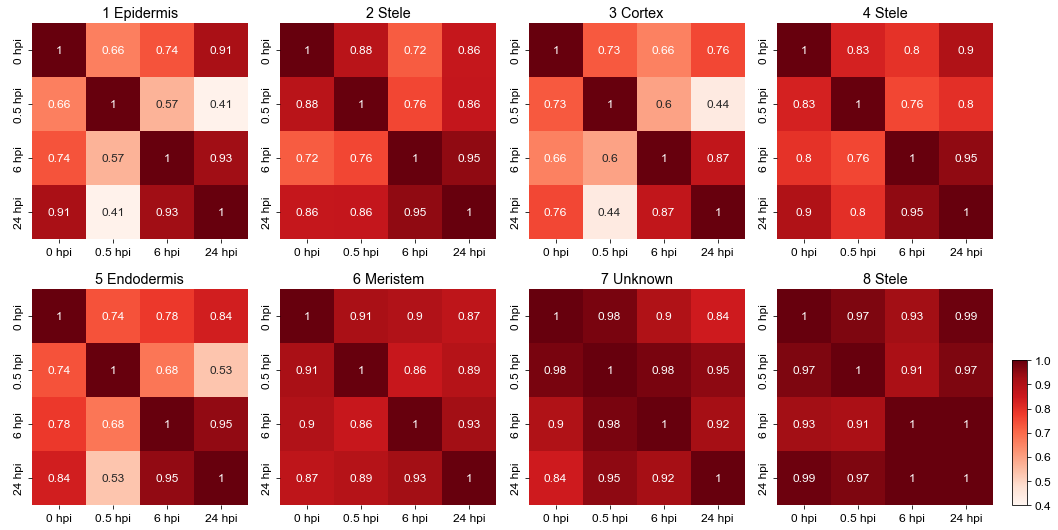

In [ ]:
pwStack(lsBk, ncols=4).add_colorbar(vmin=0.4, cmap=plt.get_cmap("Reds"), x = 1.02, hratio=0.3).savefig()

# Gene Category

In [ ]:
ad_forCmeans = ad[ad.obs.eval("leiden_merged != '9'")]

In [ ]:
dt_passFilterGeneCounts = {x: 0 for x in ad_forCmeans.var.index}
for cluster, _ad in singleCellTools.basic.splitAdata(
    ad_forCmeans, "leiden_merged", needName=True, disableBar=True, copy=False
):
    _ls = (
        _ad.to_df("raw")
        .groupby(_ad.obs["Sample"])
        .apply(lambda df: (df > 0).mean(0))
        .max(0)
        .loc[lambda sr: sr > 0.1]
        .index.to_list()
    )
#     _ls = getClusterMfuzzUsedGenes(_ad, _ls)
    for x in _ls:
        dt_passFilterGeneCounts[x] = dt_passFilterGeneCounts[x] + 1

In [ ]:
ls_allExpressedGene = [x for x,y in dt_passFilterGeneCounts.items() if y == 8]

In [ ]:
ad_sampleClusterMerged = singleCellTools.geneEnrichInfo._mergeData(ad, ['leiden_merged', 'Sample_4'])

In [ ]:
ad_sampleClusterMerged = ad_sampleClusterMerged[ad_sampleClusterMerged.obs.eval("leiden_merged != '9'")]

In [ ]:
singleCellTools.basic.initLayer(ad_sampleClusterMerged, total=1e6)

In [ ]:
_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
ad_sampleClusterMerged.obs = ad_sampleClusterMerged.obs.assign(Sample = lambda df:df['Sample_4'].astype('category').cat.set_categories(ls_sample))

In [ ]:
ad_sampleClusterMerged.layers[
    "cluster_scaled"
] = ad_sampleClusterMerged.to_df() - ad_sampleClusterMerged.to_df().groupby(
    ad_sampleClusterMerged.obs["leiden_merged"]
).transform(
    "mean"
)

In [ ]:
# ad_sampleClusterMerged.layers["cluster_scaled"] = ad_sampleClusterMerged.to_df(
#     "cluster_scaled"
# ) / ad_sampleClusterMerged.to_df("cluster_scaled").groupby(
#     ad_sampleClusterMerged.obs["leiden_merged"]
# ).transform(
#     "std"
# )

In [ ]:
ad_sampleClusterMerged = ad_sampleClusterMerged[:, ls_allExpressedGene]

In [ ]:
import importlib
import jpy_tools.otherTools
importlib.reload(jpy_tools.otherTools)
importlib.reload(singleCellTools.plotting)

from jpy_tools.otherTools import clusterWithKmeans

In [ ]:
df_mat = ad_sampleClusterMerged.to_df('cluster_scaled')

In [ ]:
nt_colHierWithKmean = clusterWithKmeans(df_mat, 6, 0.8, kwargs_to_clustermap=dict(metric='cosine'))

In [ ]:
nt_colHierWithKmean.kMeansCluster = {x+1:y for x,y in nt_colHierWithKmean.kMeansCluster.items()}

In [ ]:
ad_sampleClusterMerged.obs = ad_sampleClusterMerged.obs.eval(
    "Sample = Sample.astype('category').cat.set_categories(@ls_sample)", engine="python"
)

In [ ]:
_dt = pd.Series(nt_colHierWithKmean.kMeansCluster).explode().rename("gene").rename_axis(
    "cluster"
).reset_index().set_index("gene").reindex(ad_sampleClusterMerged.var.index)['cluster'].to_dict()

In [ ]:
_df = ad_sampleClusterMerged.to_df("cluster_scaled").rename_axis(
    "clusterStage"
).stack().rename("exp").reset_index().eval(
    "cluster = clusterStage.str.split(r'\|\|').str[0] \n \
    sample = clusterStage.str.split(r'\|\|').str[1].astype('category').cat.set_categories(@ls_sample) \n \
    category = gene_ids.map(@_dt)",
    engine="python",
)

In [ ]:
ad.obs['leiden_merged'] = ad.obs['leiden_merged'].astype('category')

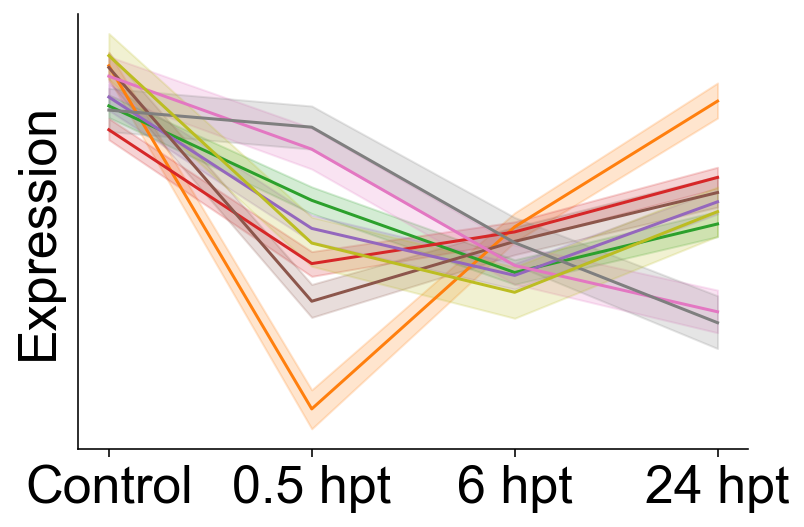

In [ ]:
sns.lineplot(
    x="sample",
    y="exp",
    hue="cluster",
    data=_df.query("category == 1"),
    ci=90,
    palette=singleCellTools.basic.getadataColor(ad, "leiden_merged"),
)
plt.gca().get_legend().remove()
plt.yticks([])
plt.ylabel("Expression", fontsize=26)
plt.xticks(fontsize=26)
plt.xticks([0,1,2,3], ['Control', '0.5 hpt', '6 hpt', '24 hpt'])
plt.xlabel("")
sns.despine()

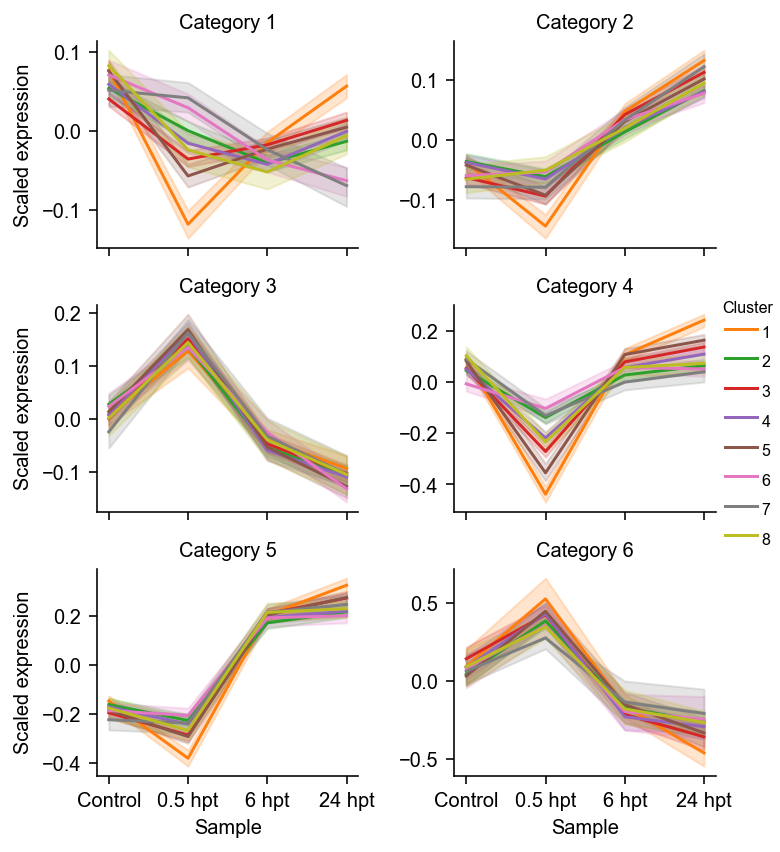

In [ ]:
g = sns.FacetGrid(
    data=_df.dropna().assign(category=lambda df: df["category"].astype(int)).assign(sample_c=lambda df:df['sample'].map(dt_hpi2hpt_)),
    col="category",
    col_wrap=2,
    sharey=False,
    hue="cluster",
    palette=singleCellTools.basic.getadataColor(ad, "leiden_merged"),
    aspect=1.3,
    height=2
)

g.map_dataframe(sns.lineplot, x="sample_c", y="exp", ci=99)
g.set_titles(col_template="Category {col_name}")
g.set_xlabels("Sample")
g.set_ylabels("Scaled expression")
g.add_legend(title='Cluster')

In [ ]:
# pd.Series(nt_colHierWithKmean.kMeansCluster).explode().rename("Gene").rename_axis(
#     "Gene category"
# ).to_frame().assign(Name=lambda df: df["Gene"].map(dt_locus2name)).fillna('').to_excel(f"{dir_result}/kmean_gene_category_0801.xlsx")

In [ ]:
ad_sampleClusterMerged.obs['Cluster'] = ad_sampleClusterMerged.obs['leiden_merged']

In [ ]:
from adjustText import adjust_text

In [ ]:
_dt = singleCellTools.basic.getadataColor(ad, "leiden_merged")
ad_sampleClusterMerged = singleCellTools.basic.setadataColor(ad_sampleClusterMerged, "Cluster", _dt)

In [ ]:
ad_sampleClusterMerged.obs['Sample'] = ad_sampleClusterMerged.obs['Sample'].map(lambda x: 'Control' if x == '0 hpi' else x)

In [ ]:
ad_sampleClusterMerged.obs['Sample'] = ad_sampleClusterMerged.obs['Sample'].map(dt_hpi2hpt)

12


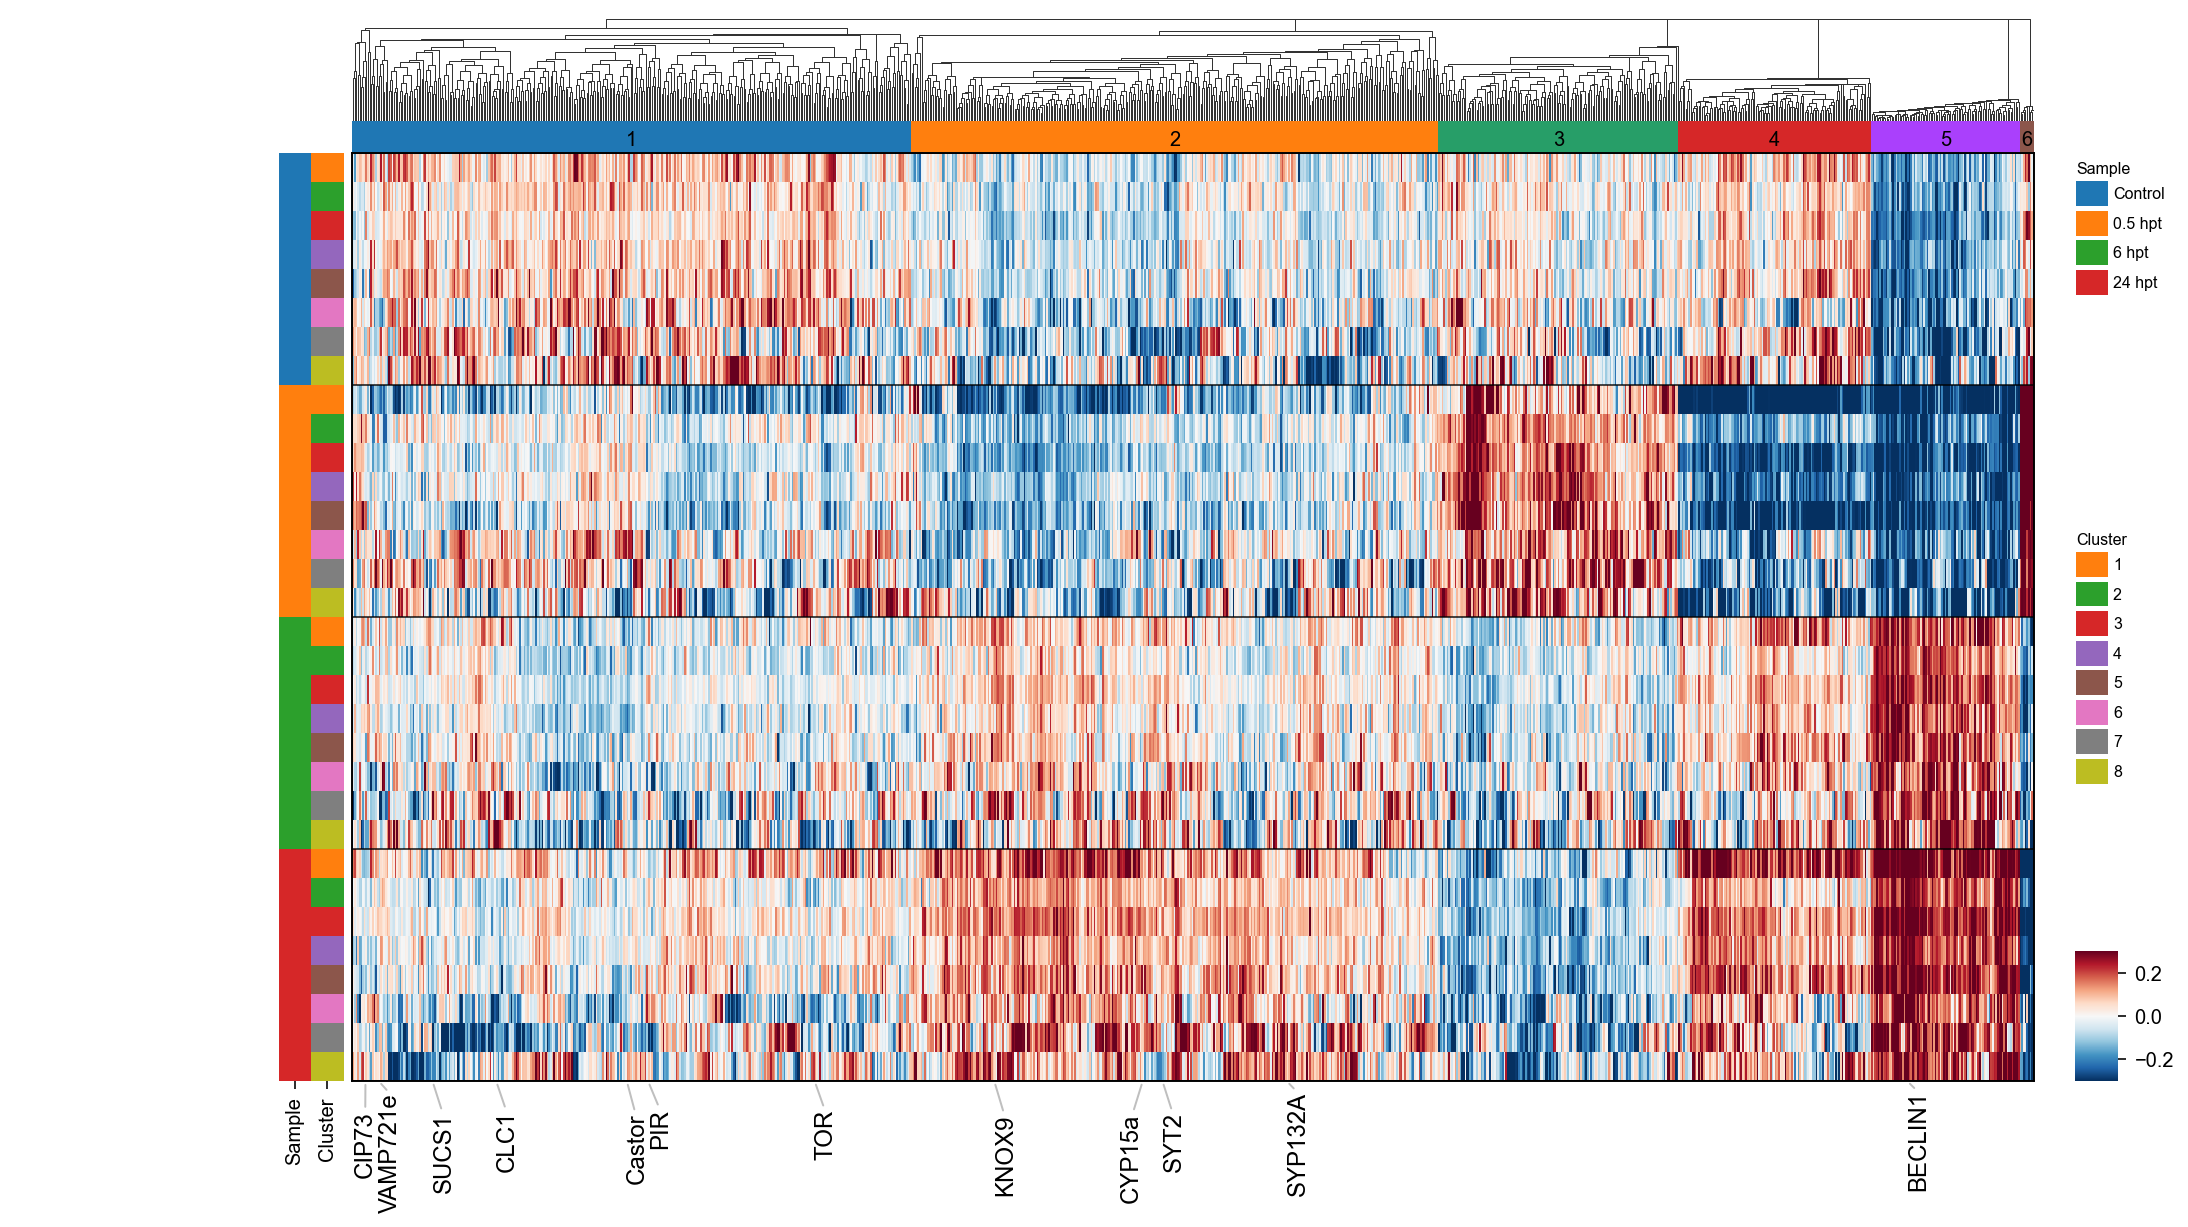

In [ ]:
g = singleCellTools.plotting.clustermap(
    ad_sampleClusterMerged[:, nt_colHierWithKmean.featureOrder],
    nt_colHierWithKmean.kMeansCluster,
    ["Sample", "Cluster"],
    layer="cluster_scaled",
    add_gene_name=True,
    reverseGeneNameInColColor=True,
    cmap="RdBu_r",
    vmax=0.3,
    vmin=-0.3,
    col_linkage=nt_colHierWithKmean.linkage,
    col_cluster=True,
    legendAlign="v",
    space_obsAnnoLegend=0.4,
    forceShowModuleColor=True,
    dendrogram_ratio=0.1,
    legendPos=1.02,
    figsize=(15, 9)
    #     addGeneSplitLine=True,
)

fig = g.ax_heatmap.figure
ax = fig.add_axes([0, 1, 1, 1])
plt.sca(ax)
pos_axHeatmap = g.ax_heatmap.get_position()
ax.set_position(
    [
        pos_axHeatmap.x0,
        pos_axHeatmap.y0 - 0.1,
        pos_axHeatmap.x1 - pos_axHeatmap.x0,
        0.1,
    ]
)
plt.xlim(g.ax_heatmap.get_xlim())
plt.ylim((0, 100))

ls_text = []
for gene in [x for x in nt_colHierWithKmean.featureOrder if x in ls_snfGenes]:
    name = dt_locus2name[gene]
    pos = nt_colHierWithKmean.featureOrder.index(gene)
    text = plt.text(
        pos, 100, name, ha="center", va="top", rotation=90, fontdict=dict(size=12)
    )
    ls_text.append(text)

x = adjust_text(
    ls_text,
    x=np.array(
        np.meshgrid(
            np.linspace(*g.ax_heatmap.get_xlim(), 1000), np.linspace(90, 100, 30)
        )
    ).T.reshape(-1, 2)[:, 0],
    y=np.array(
        np.meshgrid(
            np.linspace(*g.ax_heatmap.get_xlim(), 1000), np.linspace(90, 100, 30)
        )
    ).T.reshape(-1, 2)[:, 1],
    lim=1000,
    force_text=(0.2, 0),
    force_points=(0, 0.01),
    expand_text=(1.2, 1),
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5),
    ha="center",
    va="top",
    precision=0.0001,
    arrow_bbox_pos=(0.5, 1),
)
plt.axis("off")
print(x)

g.ax_heatmap.invert_xaxis()
g.ax_col_dendrogram.invert_xaxis()
g.ax_col_colors.invert_xaxis()

width = 0.03
pos = g.ax_row_colors.get_position()
g.ax_row_colors.set_position([pos.x1 - width, pos.y0, width, pos.y1 - pos.y0])

plt.show()

136


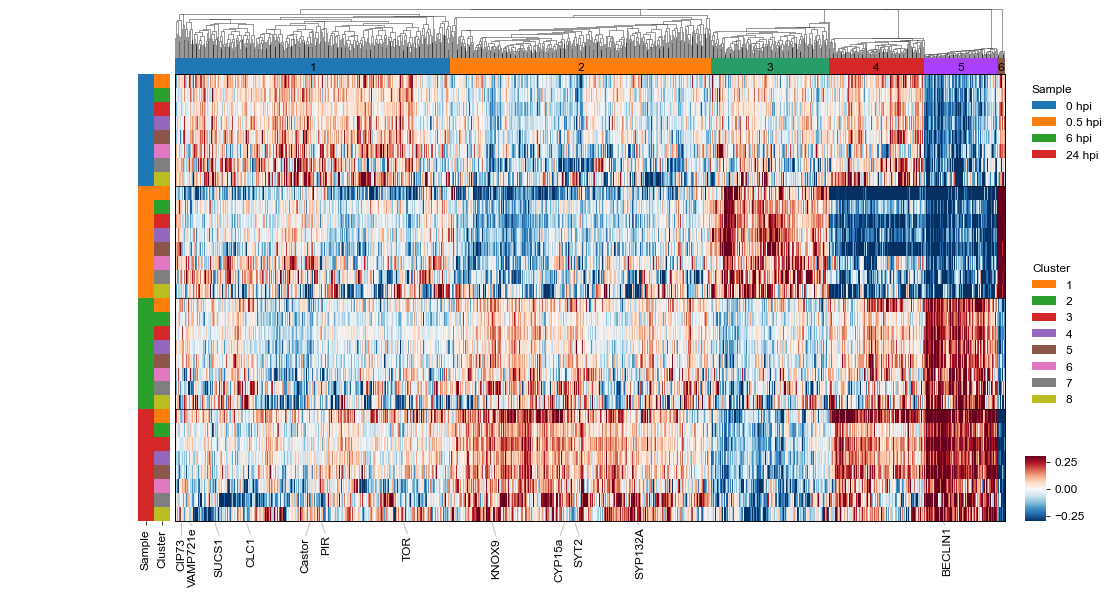

In [ ]:
g = singleCellTools.plotting.clustermap(
    ad_sampleClusterMerged[:, nt_colHierWithKmean.featureOrder],
    nt_colHierWithKmean.kMeansCluster,
    ["Sample", "Cluster"],
    layer="cluster_scaled",
    add_gene_name=True,
    reverseGeneNameInColColor=True,
    cmap="RdBu_r",
    vmax=0.3,
    vmin=-0.3,
    col_linkage=nt_colHierWithKmean.linkage,
    col_cluster=True,
    legendAlign="v",
    space_obsAnnoLegend=0.4,
    forceShowModuleColor=True,
    dendrogram_ratio=0.1,
    legendPos=1.02,
    figsize=(15, 9)
    #     addGeneSplitLine=True,
)

fig = g.ax_heatmap.figure
ax = fig.add_axes([0, 1, 1, 1])
plt.sca(ax)
pos_axHeatmap = g.ax_heatmap.get_position()
ax.set_position(
    [
        pos_axHeatmap.x0,
        pos_axHeatmap.y0 - 0.1,
        pos_axHeatmap.x1 - pos_axHeatmap.x0,
        0.1,
    ]
)
plt.xlim(g.ax_heatmap.get_xlim())
plt.ylim((0, 100))

ls_text = []
for gene in [x for x in nt_colHierWithKmean.featureOrder if x in ls_snfGenes]:
    name = dt_locus2name[gene]
    pos = nt_colHierWithKmean.featureOrder.index(gene)
    text = plt.text(
        pos, 100, name, ha="center", va="top", rotation=90, fontdict=dict(size=12)
    )
    ls_text.append(text)

x = adjust_text(
    ls_text,
    x=np.array(
        np.meshgrid(
            np.linspace(*g.ax_heatmap.get_xlim(), 1000), np.linspace(90, 100, 30)
        )
    ).T.reshape(-1, 2)[:, 0],
    y=np.array(
        np.meshgrid(
            np.linspace(*g.ax_heatmap.get_xlim(), 1000), np.linspace(90, 100, 30)
        )
    ).T.reshape(-1, 2)[:, 1],
    lim=1000,
    force_text=(0.2, 0),
    force_points=(0, 0.01),
    expand_text=(1.2, 1),
    arrowprops=dict(arrowstyle="-", color="gray", alpha=0.5),
    ha="center",
    va="top",
    precision=0.0001,
    arrow_bbox_pos=(0.5, 1),
)
plt.axis("off")
print(x)

g.ax_heatmap.invert_xaxis()
g.ax_col_dendrogram.invert_xaxis()
g.ax_col_colors.invert_xaxis()

width = 0.03
pos = g.ax_row_colors.get_position()
g.ax_row_colors.set_position([pos.x1 - width, pos.y0, width, pos.y1 - pos.y0])

plt.show()

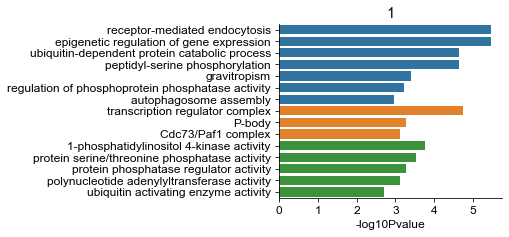

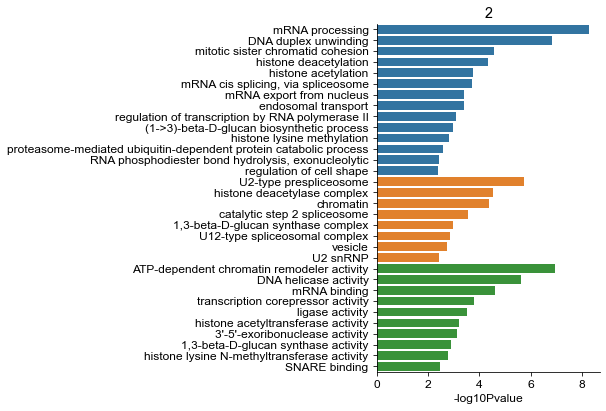

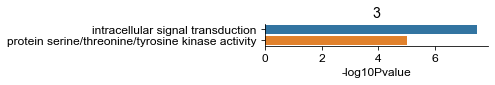

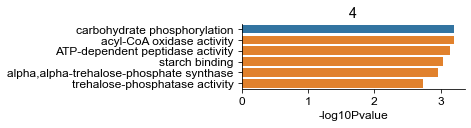

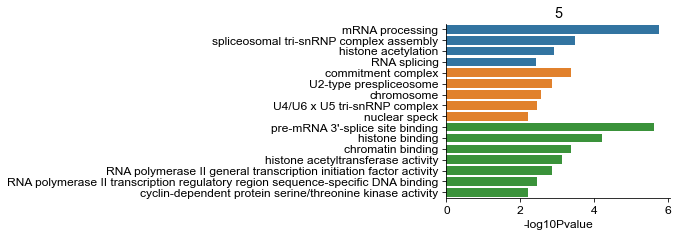

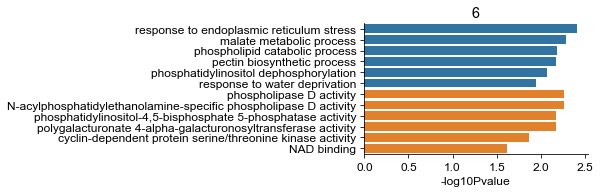

In [ ]:
lsDf_go = []
for cellType, ls_genes in nt_colHierWithKmean.kMeansCluster.items():
    df_go = enrichmentAnalysisGO(ls_genes, ad.var.index.to_list()).assign(
        category=cellType
    )
    if df_go.empty:
        continue
    fig, ax = plt.subplots(figsize=(4, df_go.shape[0] * 0.2))
    df_go["Description"] = df_go["Description"].str.split(r" \(").str[0]
    sns.barplot(
        data=df_go,
        x="-log10Pvalue",
        y="Description",
        hue="Category",
        ax=ax,
        dodge=False,
    )
    ax.get_legend().remove()
    #     plt.legend(loc='lower left', bbox_to_anchor=[-1.2,-0.4], ncol=3, frameon=False)
    plt.ylabel("")
    sns.despine(top=True, right=True)
    plt.title(cellType)
    plt.show()
    lsDf_go.append(df_go)

In [ ]:
df_kmeansCategoryGo.query("Description == 'receptor-mediated endocytosis'")['geneID'].iloc[0]

'MTR_4g112045/MTR_3g070940/MTR_8g072250/MTR_5g034780'

In [ ]:
dt_locus2name['MTR_3g070940']

'CLC1'

In [ ]:
df_kmeansCategoryGo = pd.concat(lsDf_go)

In [ ]:
df_kmeansCategoryGo['Category'] = df_kmeansCategoryGo['Category'].map( {x:y for x,y in zip(['biological_process', 'cellular_component', 'molecular_function'],['Biological Process', 'Cellular Component', 'Molecular Function'])})

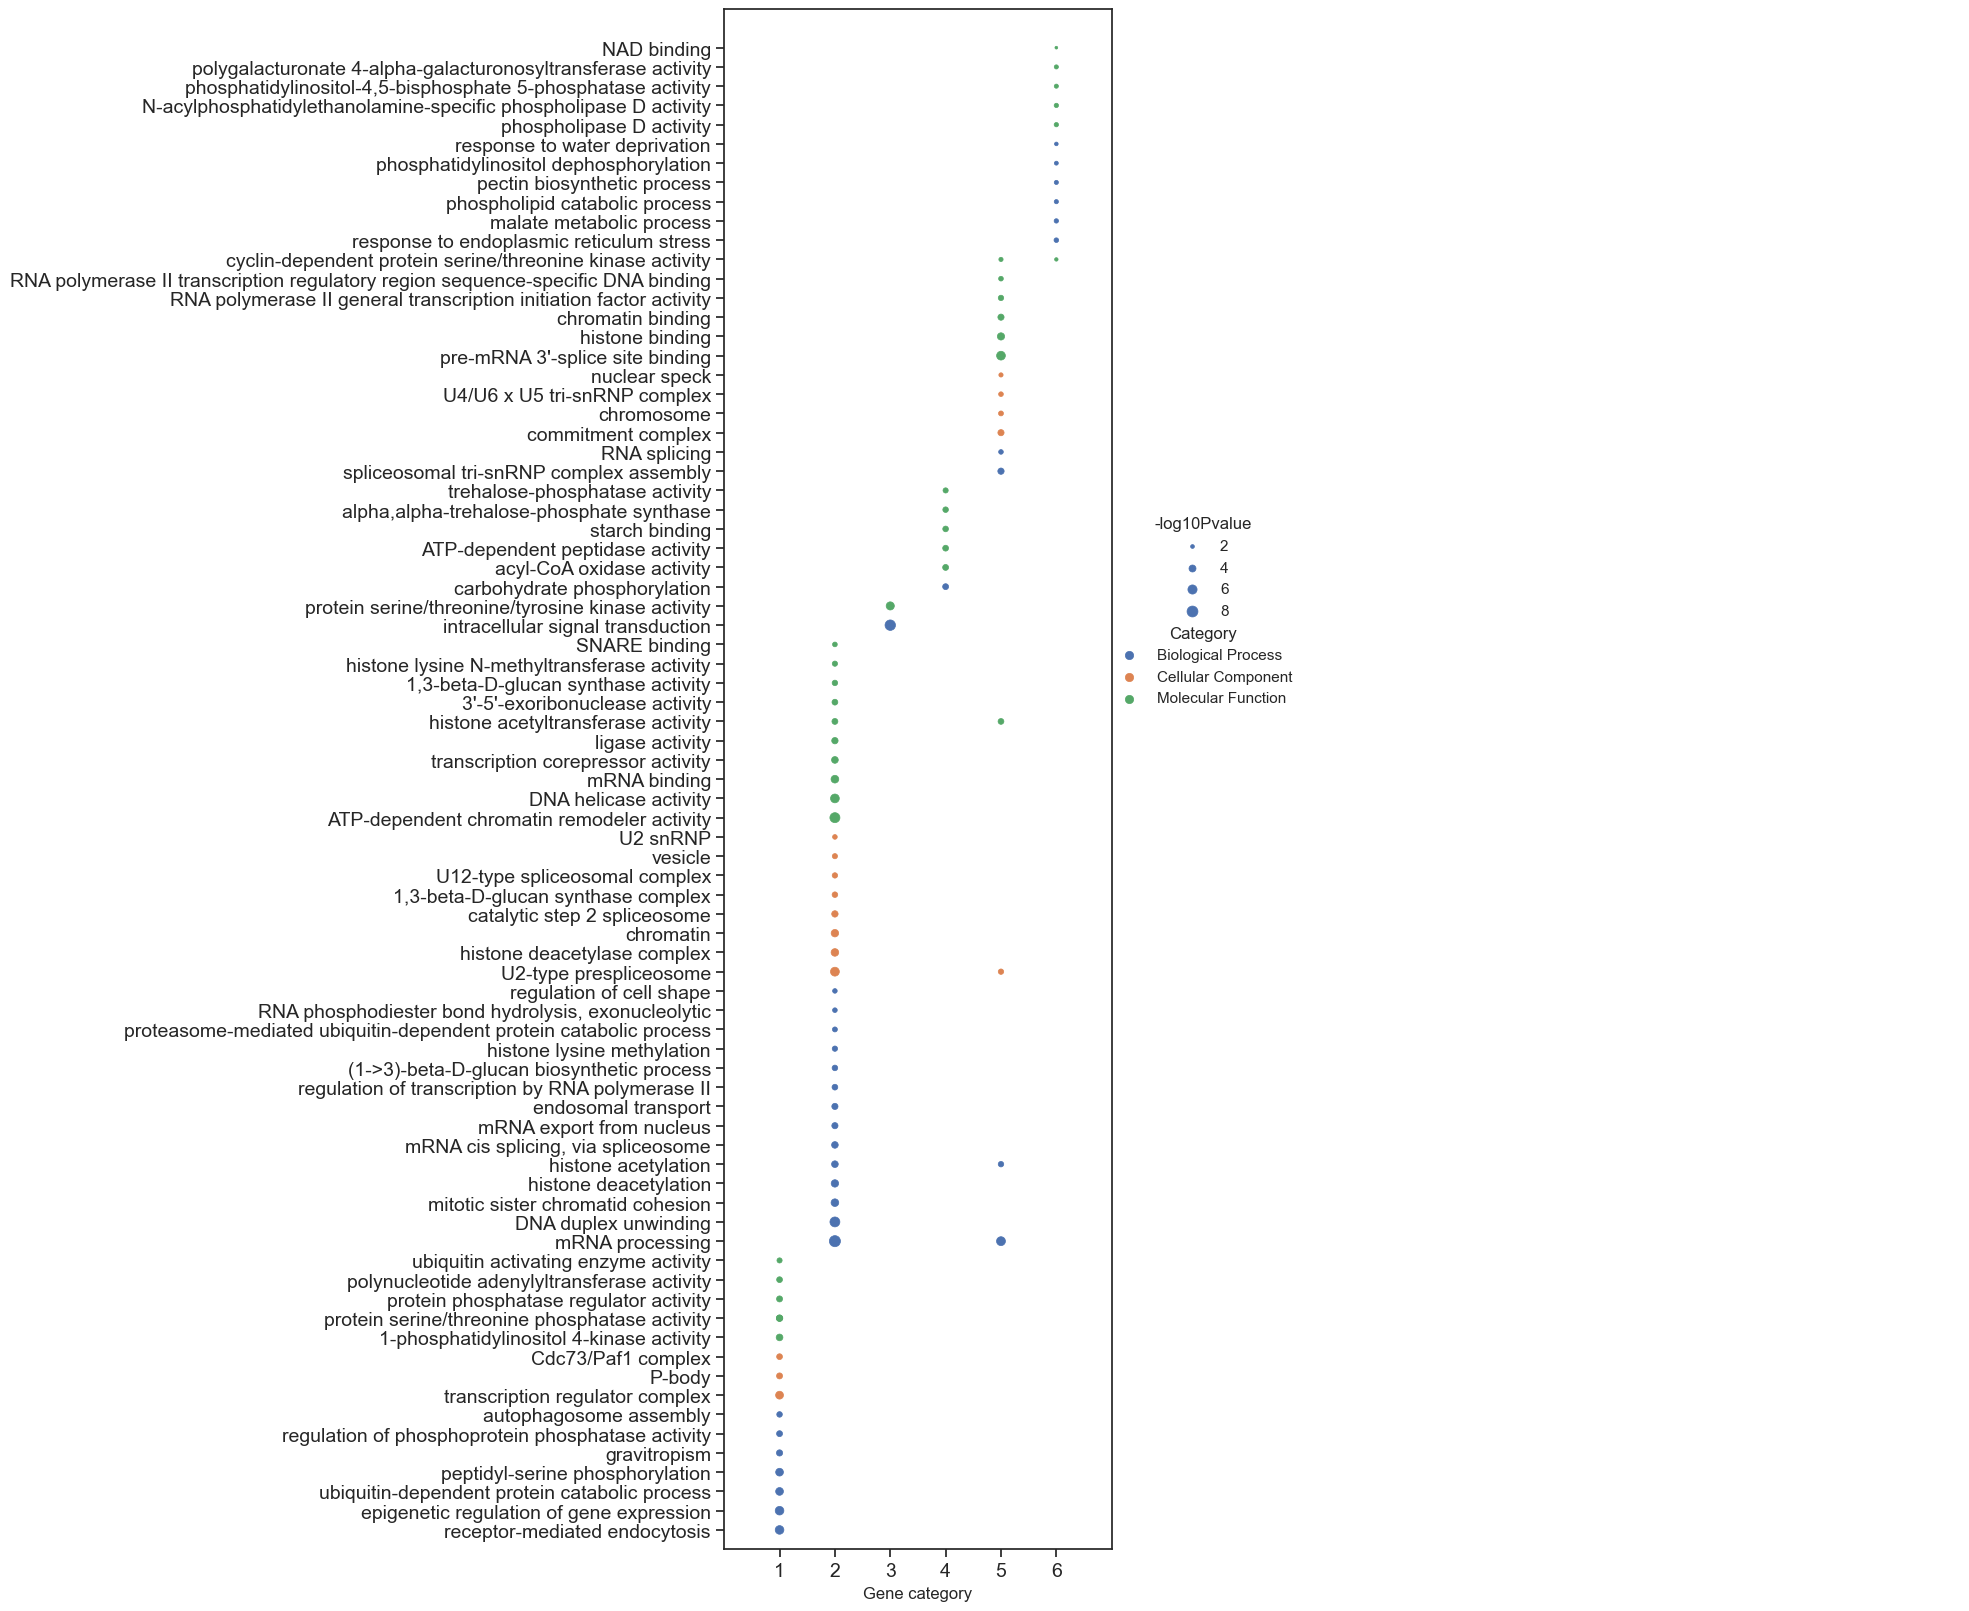

In [ ]:
fig = (
    so.Plot(data=df_kmeansCategoryGo.reset_index(), x='category', y='Description', pointsize='-log10Pvalue', color='Category')
    .add(so.Dot())
    .scale(x=so.Nominal())
    .limit(y=(-1,len(df_kmeansCategoryGo['ID'].unique())), x=(-1,6))
    .theme({**sns.axes_style('ticks'), 'legend.frameon': False, 'ytick.labelsize': 14, 'xtick.labelsize': 14})
    .label(x='Gene category', y='')
    .layout(size=(5,20))
    .plot()._figure
)

leg = fig.legends[0]
leg.set(bbox_to_anchor=(2.2,0.5))
fig

# Timepoint Gene

In [ ]:
lsDf = []
for cellType, _ad in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if cellType == '9 Unknown':
        continue
    _ad = ad[ad.obs.eval("ct_merged == @cellType")]
    _ad.X = _ad.layers['raw'].A
    for sample in ls_sample:
        df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
            _ad,
            "Sample",
            testName=sample,
            category='up'
        )
        df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = cellType, sample=sample)
        lsDf.append(df_diffxpyResult)
    del(_ad)

df_diffxpyResult = pd.concat(lsDf)

df_diffxpyResult["cluster"] = (
    df_diffxpyResult["cluster"]
    .astype("category")
    .cat.set_categories(
        [
            "1 Epidermis",
            "2 Stele",
            "3 Cortex",
            "4 Stele",
            "5 Endodermis",
            "6 Meristem",
            "7 Unknown",
            "8 Stele",
        ]
    )
)

df_diffxpyResult["sample"] = (
    df_diffxpyResult["sample"].astype("category").cat.set_categories(ls_sample)
)

ad.uns["diffxpy_clusterResponse"] = df_diffxpyResult

In [ ]:
_lsDf = []
for (cluster, sample), ls_obsIndex in (
    ad.obs.groupby(["ct_merged", "Sample"])
    .apply(lambda df: df.index.to_list())
    .to_dict()
    .items()
):
    _lsDf.append(
        pd.Series((ad[ls_obsIndex].layers["raw"] > 0).mean(0).A1, index=ad.var.index)
        .rename_axis("gene")
        .rename("ratio")
        .reset_index()
        .assign(cluster=cluster, sample=sample, totalCount = len(ls_obsIndex), expressedCount = lambda df:len(ls_obsIndex) * df['ratio'])
    )
df_clusterGeneExpressedRatio = pd.concat(_lsDf)

In [ ]:
df_diffxpyResult = df_diffxpyResult.merge(df_clusterGeneExpressedRatio, on=['gene', 'cluster', 'sample'], how='left')

In [ ]:
df_diffxpyResult = ad.uns["diffxpy_clusterResponse"]

In [ ]:
_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
df_diffxpyResult = df_diffxpyResult.assign(sample = lambda df:df['sample'].map(lambda x:_dt.get(x,x))).assign(Sample_4 = lambda df:df['sample'].astype('category').cat.set_categories(ls_sample), cluster = lambda df:df['cluster'].astype('category'))

In [ ]:
df_diffxpyResult = df_diffxpyResult.query("qval < 0.05 & log2fc > 1")

In [ ]:
df_responseGeneCounts = df_diffxpyResult.value_counts(['cluster', 'Sample_4']).rename('counts').reset_index()

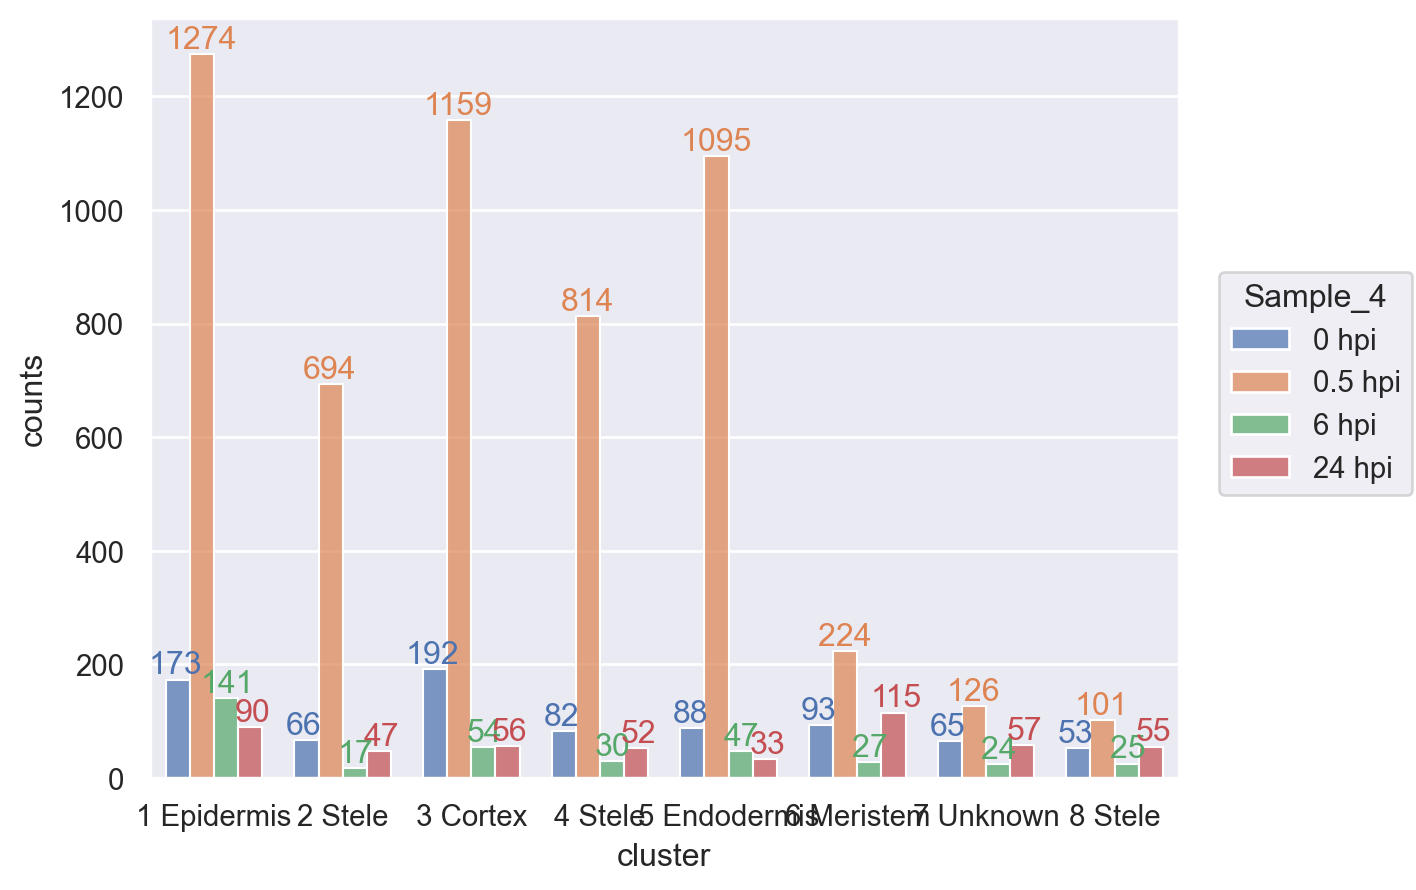

In [ ]:
df_responseGeneCounts.sort_values(['cluster', 'Sample_4']).pipe(so.Plot, x='cluster', y='counts', color='Sample_4', text='counts')\
.add(so.Bars(width=0.75), so.Dodge(by=['color']))\
.add(so.Text(valign='bottom', halign='center', offset=0), so.Dodge(by=['color']))\
.layout(engine='tight')

In [ ]:
df_responseGeneCounts['Sample_d'] = df_responseGeneCounts['Sample_4'].map(dt_hpi2hpt_)

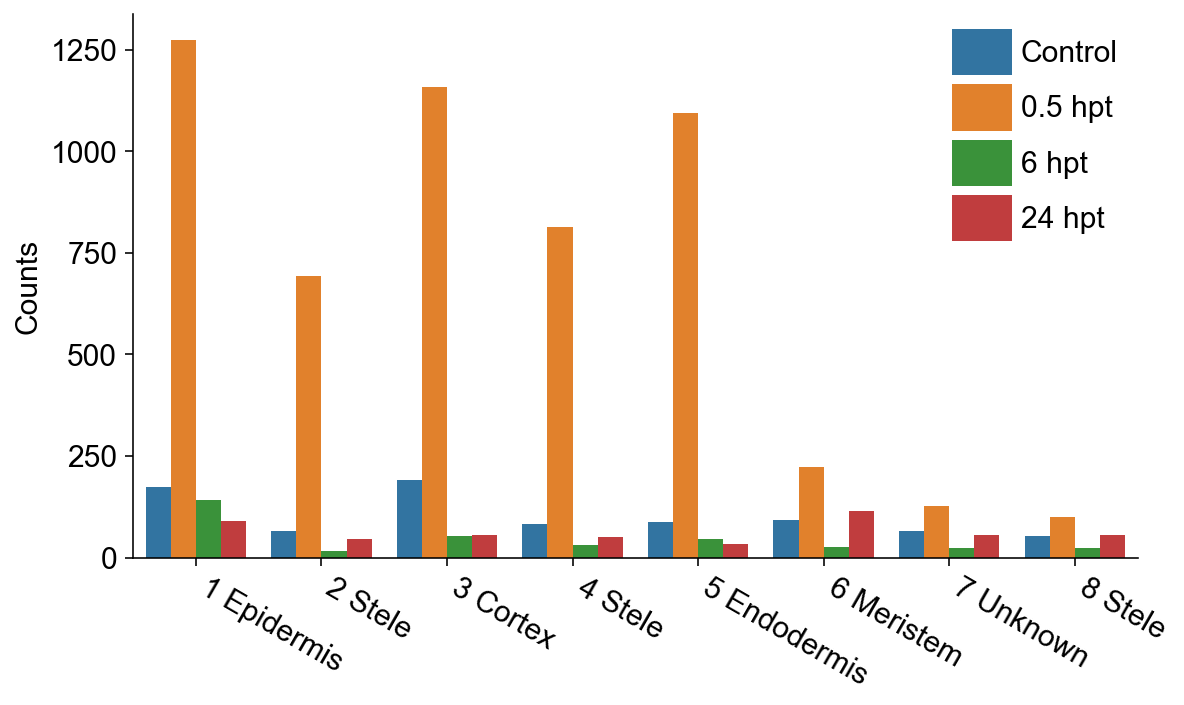

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data = df_responseGeneCounts, x='cluster', y = 'counts', hue='Sample_d')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1), frameon=False, fontsize=15)
plt.xticks(rotation=-30, ha='left')
plt.xlabel('')
plt.ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from matplotlib import ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

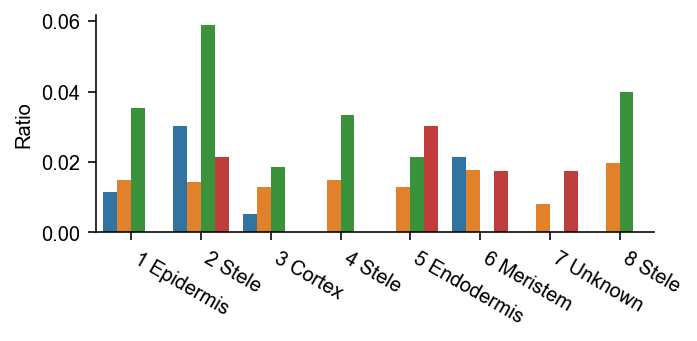

In [ ]:
_df_ratio = df_diffxpyResult.query("gene in @ls_snfGenes").value_counts(
    ["cluster", "sample"]
).sort_index() / df_diffxpyResult.value_counts(["cluster", "sample"]).sort_index()
_df_ratio = _df_ratio.rename('ratio').reset_index()
_df_ratio['sample'] = _df_ratio['sample'].astype('category').cat.set_categories(ls_sample)

fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(data = _df_ratio, x='cluster', y = 'ratio', hue='sample')
sns.despine(top=True, right=True)
plt.legend(loc='upper left', bbox_to_anchor=(0, 0), frameon=False, ncol=4)
ax.get_legend().remove()
plt.xticks(rotation=-30, ha='left')
plt.xlabel('')
plt.ylabel('Ratio')
plt.show()

In [ ]:
def _filter(sr):
    ls_genes = dt_specficGenes[sr.loc['cluster'].split(' ')[0]]
    if sr.loc['gene'] in ls_genes:
        return True
    else:
        return False

In [ ]:
df_diffxpyResultSpec=df_diffxpyResult.loc[lambda df: df.apply(_filter, axis=1)]

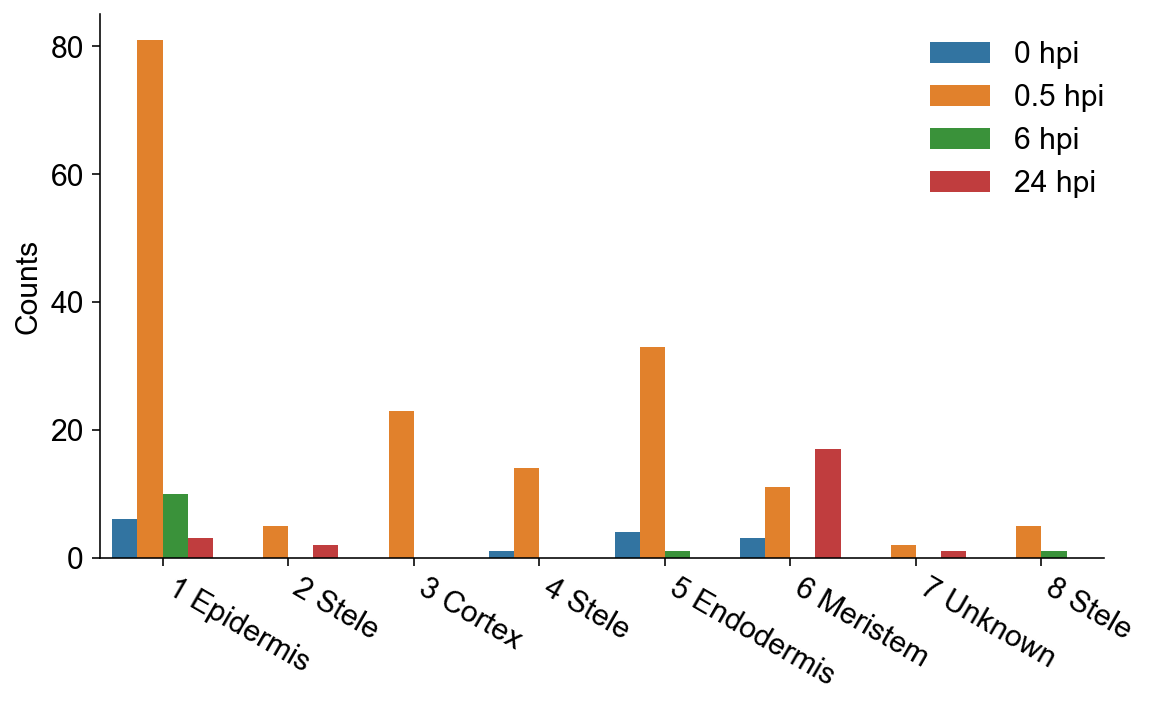

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data = df_diffxpyResultSpec
    .value_counts(["cluster", "Sample_4"])
    .rename("counts")
    .reset_index(), 
    x='cluster',
    y = 'counts',
    hue='Sample_4')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1), frameon=False, fontsize=15)
plt.xticks(rotation=-30, ha='left')
plt.xlabel('')
plt.ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from matplotlib import ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In [ ]:
df_responseGeneCounts['Sample_d'] = df_responseGeneCounts['Sample_4'].map(dt_hpi2hpt_)

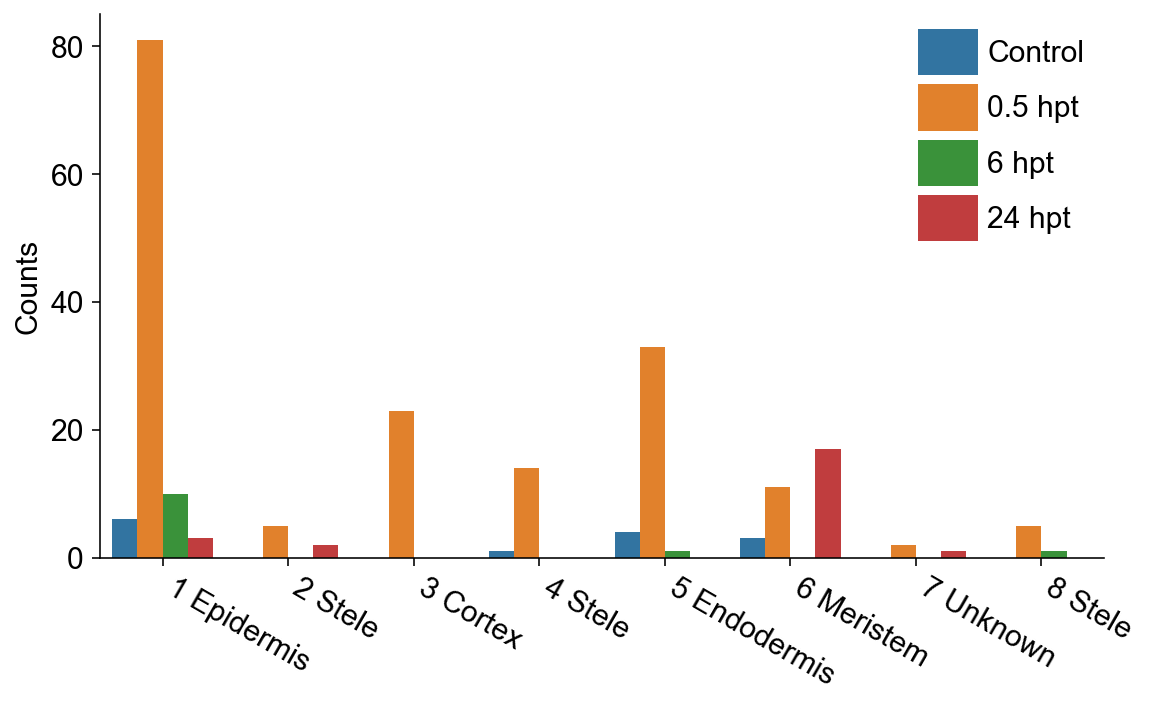

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data = df_diffxpyResultSpec
    .value_counts(["cluster", "Sample_4"])
    .rename("counts")
    .reset_index()
    .assign(sample_c = lambda df:df['Sample_4'].map(dt_hpi2hpt_)), 
    x='cluster',
    y = 'counts',
    hue='sample_c')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1), frameon=False, fontsize=15)
plt.xticks(rotation=-30, ha='left')
plt.xlabel('')
plt.ylabel('Counts')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from matplotlib import ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In [ ]:
(df_diffxpyResultSpec
    .value_counts(["cluster", "Sample_4"])
    .rename("counts")
    .reset_index()
    .sort_values(['cluster', 'Sample_4']))

,cluster,Sample_4,counts
7,1 Epidermis,0 hpi,6
0,1 Epidermis,0.5 hpi,81
6,1 Epidermis,6 hpi,10
12,1 Epidermis,24 hpi,3
9,2 Stele,0.5 hpi,5
13,2 Stele,24 hpi,2
2,3 Cortex,0.5 hpi,23
16,4 Stele,0 hpi,1
4,4 Stele,0.5 hpi,14
10,5 Endodermis,0 hpi,4


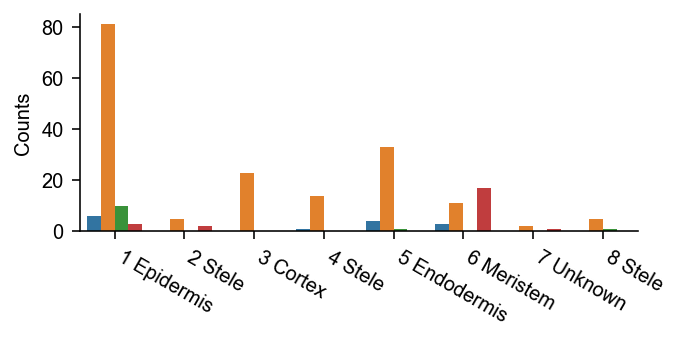

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
sns.barplot(
    data=df_diffxpyResultSpec
    .value_counts(["cluster", "Sample_4"])
    .rename("counts")
    .reset_index(),
    x="cluster",
    y="counts",
    hue="Sample_4",
)
plt.legend(loc="upper left", bbox_to_anchor=(0.8, 1), frameon=False)
ax.get_legend().remove()
plt.xticks(rotation=-30, ha="left")
plt.xlabel("")
plt.ylabel("Counts")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
df_responseGeneCounts = df_diffxpyResult.value_counts(['cluster', 'Sample_4']).rename('counts').reset_index().assign(type='All induced genes')
df_responseSpecGeneCounts = df_diffxpyResultSpec.value_counts(['cluster', 'Sample_4']).rename('counts').reset_index().assign(type='Cluster-specific genes')
_df = pd.concat([df_responseGeneCounts, df_responseSpecGeneCounts])

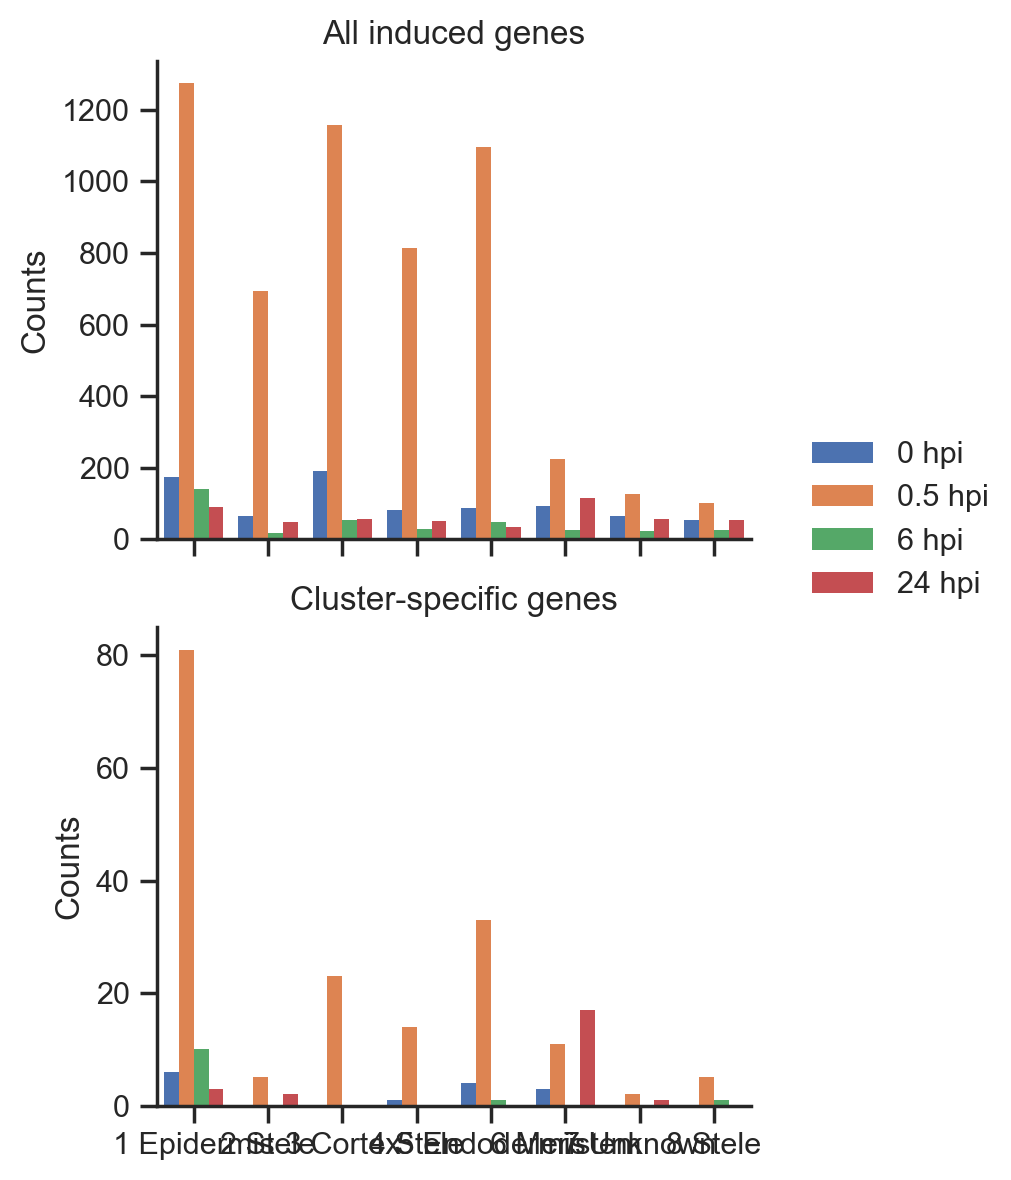

In [ ]:
fig = (
    so.Plot(_df, x='cluster', y='counts', color='Sample_4')
    .facet(row='type')
    .share(y=False)
    .add(so.Bar(edgewidth=0, alpha=1), so.Dodge())
    .label(y='Counts', x='', color='')
    .theme(dt_snsStyle)
    .layout(size=(4,6))
    .plot()._figure
)
fig

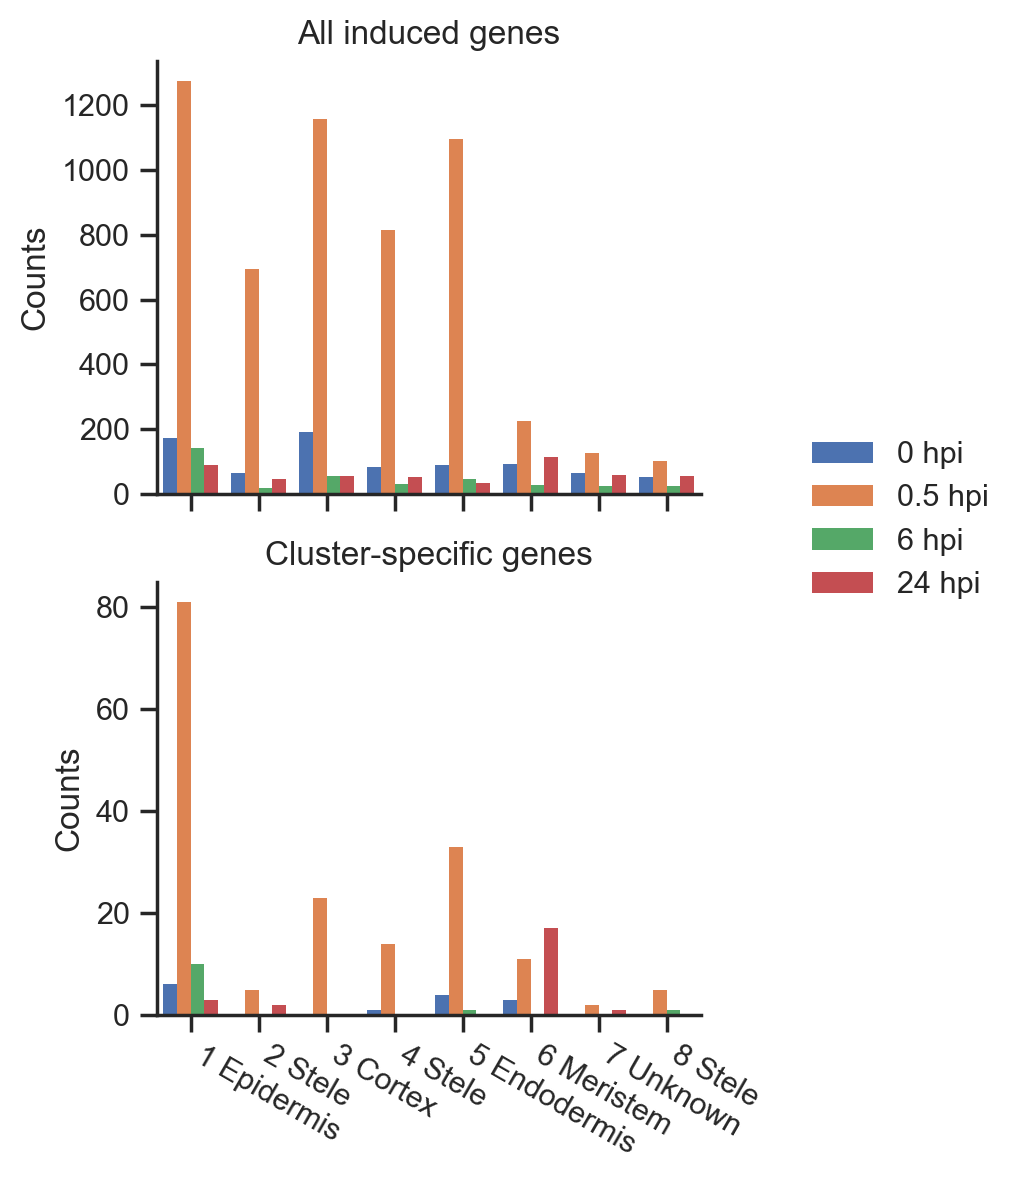

In [ ]:
ax = fig.axes[-1]
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], ha='left', rotation=-30)
fig

In [ ]:
# df_diffxpyResultSpec.to_excel(f"{dir_result}/diffxpy_response_spec.xlsx")

In [ ]:
import upsetplot

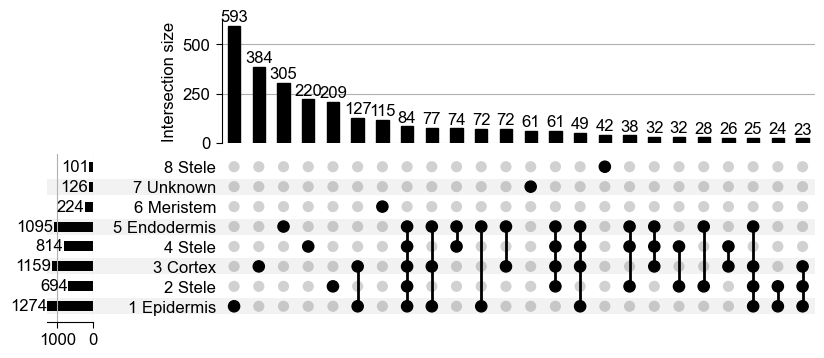

In [ ]:
_df = (
    df_diffxpyResult.query("sample == '0.5 hpi'")
    .pivot_table("mean", "gene", "cluster")
    .where(pd.isna, True)
    .fillna(False)
    .value_counts()
)
fig = plt.figure()
upsetplot.plot(
    _df,
    sort_by="cardinality",
    sort_categories_by=None,
    min_subset_size=20,
    show_counts=True,
    element_size=23,
    fig=fig,
)
fig.set_figheight(4)
fig.set_dpi(100)


## GO

In [ ]:
ls_cluster = ad.obs['ct_merged'].cat.categories.to_list()

In [ ]:
lsDf_allClusterResponseGoBgCluster = []
for cluster in ls_cluster:
    dt_sampleResponseGenes = (
        df_diffxpyResult.query("cluster == @cluster")
        .groupby("sample")["gene"]
        .agg(list)
        .to_dict()
    )
    _ad = ad[ad.obs.eval("ct_merged == @cluster")]
    _ad.X = _ad.layers["raw"]
    sc.pp.filter_genes(_ad, min_counts=3)
    for sample, ls_genes in dt_sampleResponseGenes.items():
        if len(ls_genes) < 1:
            continue
#         df_go = enrichmentAnalysisGO(ls_genes, _ad.var.index.to_list(), pvalueCutoff=1, qvalueCutoff=1).assign(
#             category=cluster, sample=sample
#         )
        df_go = enrichmentAnalysisGO(ls_genes, _ad.var.index.to_list()).assign(
            category=cluster, sample=sample
        )
        if df_go.empty:
            continue
        df_go["Description"] = df_go["Description"].str.split(r" \(").str[0]
        lsDf_allClusterResponseGoBgCluster.append(df_go)
    del(_ad)

In [ ]:
df_allClusterResponseGoBgCluster = pd.concat(lsDf_allClusterResponseGoBgCluster)

In [ ]:
_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
df_allClusterResponseGoBgCluster = (df_allClusterResponseGoBgCluster
    .assign(sample = lambda df:df['sample'].map(lambda x:_dt.get(x,x)))
    .assign(sample = lambda df:df['sample'].astype('category').cat.set_categories(ls_sample))
)

In [ ]:
df_allClusterResponseGoBgCluster["category"] = (
    df_allClusterResponseGoBgCluster["category"]
    .astype("category")
    .cat.set_categories(
        [
            "1 Epidermis",
            "2 Stele",
            "3 Cortex",
            "4 Stele",
            "5 Endodermis",
            "6 Meristem",
            "7 Unknown",
            "8 Stele",
        ]
    )
)

# df_allClusterResponseGoBgCluster["sample"] = (
#     df_allClusterResponseGoBgCluster["sample"].astype("category").cat.set_categories(ls_sample)
# )

In [ ]:
lsDf_allClusterResponseGoBgClusterSpec = []
for cluster in ls_cluster:
    dt_sampleResponseGenes = (
        df_diffxpyResultSpec.query("cluster == @cluster")
        .groupby("sample")["gene"]
        .agg(list)
        .to_dict()
    )

    for sample, ls_genes in dt_sampleResponseGenes.items():
        if len(ls_genes) < 1:
            continue
        #         df_go = enrichmentAnalysisGO(ls_genes, _ad.var.index.to_list(), pvalueCutoff=1, qvalueCutoff=1).assign(
        #             category=cluster, sample=sample
        #         )
        df_go = enrichmentAnalysisGO(ls_genes, ad.var.index.to_list()).assign(
            category=cluster, sample=sample
        )
        if df_go.empty:
            continue
        df_go["Description"] = df_go["Description"].str.split(r" \(").str[0]
        lsDf_allClusterResponseGoBgClusterSpec.append(df_go)
#     del(_ad)

R[write to console]: --> No gene can be mapped....

R[write to console]: --> Expected input gene ID: MTR_5g096970,MTR_3g094860,MTR_8g007345,MTR_3g094570,MTR_1g021080,MTR_5g087380

R[write to console]: --> return NULL...



In [ ]:
df_allClusterResponseGoBgClusterSpec = pd.concat(lsDf_allClusterResponseGoBgClusterSpec)

In [ ]:
_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
df_allClusterResponseGoBgClusterSpec = df_allClusterResponseGoBgClusterSpec.assign(sample = lambda df:df['sample'].astype('category').cat.set_categories(ls_sample))

In [ ]:
df_allClusterResponseGoBgClusterSpec["category"] = (
    df_allClusterResponseGoBgClusterSpec["category"]
    .astype("category")
    .cat.set_categories(
        [
            "1 Epidermis",
            "2 Stele",
            "3 Cortex",
            "4 Stele",
            "5 Endodermis",
            "6 Meristem",
            "7 Unknown",
            "8 Stele",
        ]
    )
)

# df_allClusterResponseGoBgClusterSpec["sample"] = (
#     df_allClusterResponseGoBgClusterSpec["sample"].astype("category").cat.set_categories(ls_sample)
# )

In [ ]:
for cluster in ls_cluster:
    df_sampleClusterResponseGo = df_allClusterResponseGoBgClusterSpec.query("category == @cluster & pvalue < 0.05 & qvalue < 0.2")
    if df_sampleClusterResponseGo.empty:
        print(cluster)
        continue
    fig, ax = plt.subplots(figsize=(3, len(df_sampleClusterResponseGo["Description"].unique()) * 0.3))
    sns.scatterplot(
        data=df_sampleClusterResponseGo.sort_values(["Category", "category", "p.adjust"]),
        x="sample",
        y="Description",
        size="-log10Pvalue",
        sizes=(10, 200),
        hue="Category",
    )
    handles, labels = ax.get_legend_handles_labels()

    leg = ax.legend(
        loc="lower left",
        bbox_to_anchor=(1, 0),
        frameon=False,
        handles=handles,
        labels=labels,
        title=ax.legend_.get_title().get_text(),
    )

    plt.xticks(ha="left", rotation=-30)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(cluster)
    plt.show()

In [ ]:
# ls_sample = ['Mock', '0.5 hpi', '6 hpi', '24 hpi']

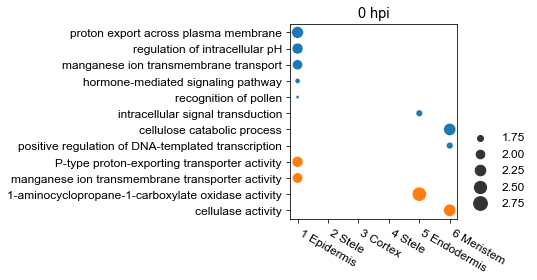

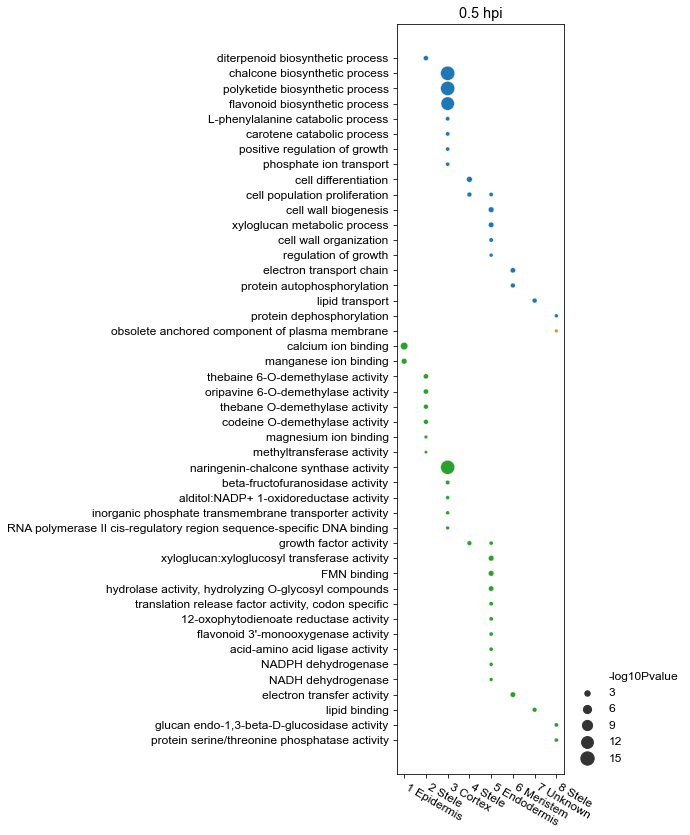

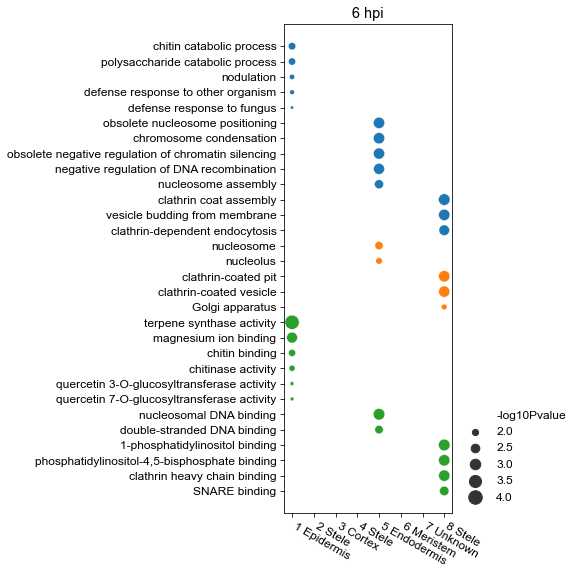

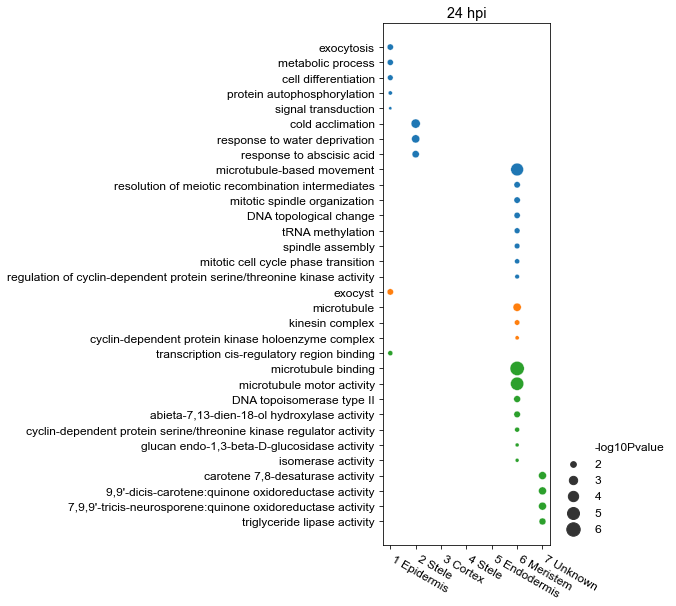

In [ ]:
for sample in ls_sample:
    df_sampleClusterResponseGo = df_allClusterResponseGoBgClusterSpec.query("sample == @sample")
    if df_sampleClusterResponseGo.empty:
        print(sample)
        continue
    fig, ax = plt.subplots(figsize=(3, len(df_sampleClusterResponseGo["Description"].unique()) * 0.3))
    sns.scatterplot(
        data=df_sampleClusterResponseGo.sort_values(["Category", "category", "p.adjust"]),
        x="category",
        y="Description",
        size="-log10Pvalue",
        sizes=(10, 200),
        hue="Category",
    )
    handles, labels = ax.get_legend_handles_labels()
    handles = handles[4:]
    labels = labels[4:]
    leg = ax.legend(
        loc="lower left",
        bbox_to_anchor=(1, 0),
        frameon=False,
        handles=handles,
        labels=labels,
        title=ax.legend_.get_title().get_text(),
    )

    plt.xticks(ha="left", rotation=-30)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(sample)
    plt.show()

In [ ]:
# ls_goPlot = ["GO:0098542", "GO:0050832", "GO:0009813", "GO:0030639", "GO:0009715", "GO:0042546", "GO:0016762", "GO:0071555"]
ls_goPlot = ["GO:0006952","GO:0006952","GO:0098542", "GO:0009813", "GO:0030639", "GO:0009715", "GO:0042546", "GO:0016762", "GO:0071555"]
ls_cluster = ['1 Epidermis', '3 Cortex', '5 Endodermis']


In [ ]:
_df = df_allClusterResponseGoBgClusterSpec.query("ID in @ls_goPlot")

In [ ]:
_df['category'] = _df['category'].astype(str).astype('category')

In [ ]:
def sizes_legend(desired_sizes, ax=None, min=None, max=None):
    ax = ax or plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if min is None:
        min = 0
    if max is None:
        max = len(labels)
    pos = (min, max)
    handles_0, handles_1, handles_2 = handles[:pos[0]], handles[pos[0]:pos[1]], handles[pos[1]:]
    labels_0, labels_1, labels_2 = labels[:pos[0]], labels[pos[0]:pos[1]], labels[pos[1]:]

    labels_1 = np.array([float(l) for l in labels_1])
    desired_handles = [handles_1[np.argmin(np.abs(labels_1 - d))] for d in desired_sizes]
    desired_handles = [*handles_0,*desired_handles,*handles_2]
    desired_sizes = [*labels_0,*desired_sizes,*labels_2]
    ax.legend(handles=desired_handles, labels=desired_sizes, title=ax.legend_.get_title().get_text())

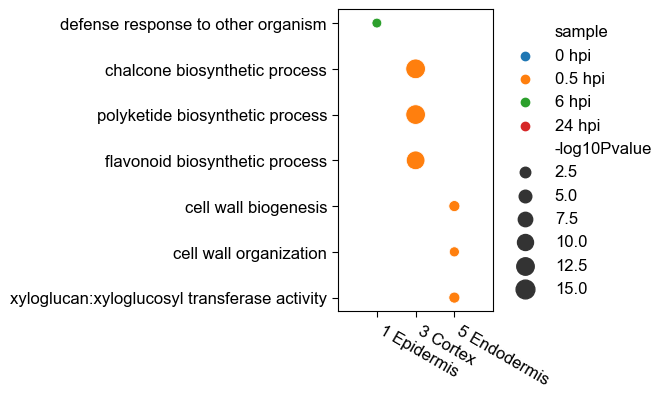

In [ ]:
with plt.rc_context({"figure.dpi": 100}):
    fig, ax = plt.subplots(figsize=(2,4))
    sns.scatterplot(data = _df, x='category', y='Description', size='-log10Pvalue', hue='sample', sizes=(50,200))
    plt.xlabel('')
    plt.xticks(rotation=-30, ha='left')
    plt.ylabel('')
    plt.legend(loc='lower left', bbox_to_anchor=(1,0), frameon=False)
    plt.xlim(-1,3)
    # sizes_legend([1,3,5,7,9], min=6)
    plt.show()

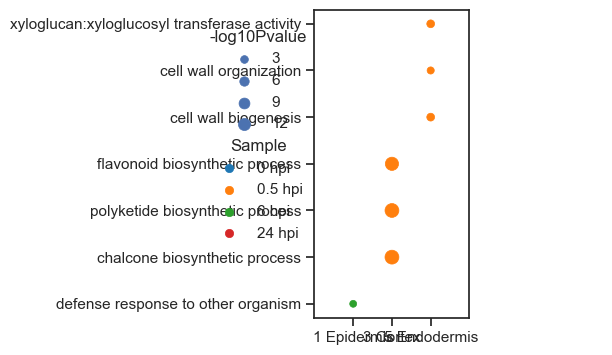

In [ ]:
g = (
    so.Plot(data=_df, x='category', y='Description', pointsize='-log10Pvalue', color='sample')
    .scale(color=singleCellTools.basic.getadataColor(ad, 'Sample_4'), pointsize=so.Continuous(values=(5,10)).tick(at=[3,6,9,12]))
    .add(so.Dot())
    .limit(x=(-1,3))
    .theme({**sns.axes_style('ticks'), 'legend.frameon': False})
    .label(x='',y='', color='Sample')
    .layout(algo='constrained', size=(2,4))
    .plot()
)
fig = g._figure
fig

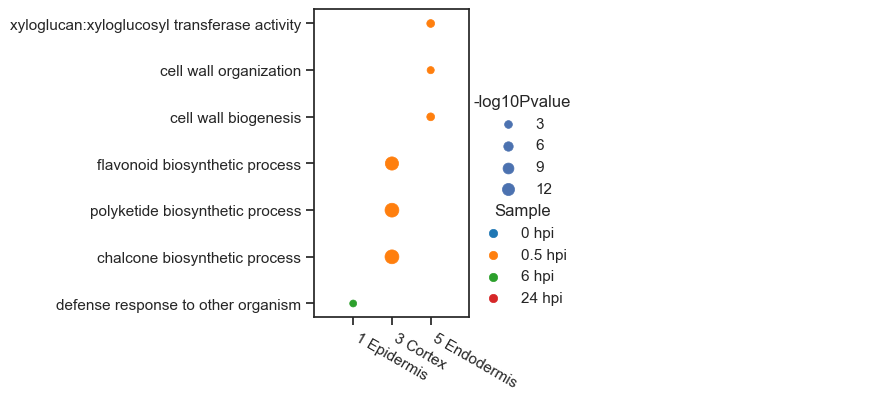

In [ ]:
ax = fig.axes[0]
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], ha='left', rotation=-30)
leg = fig.legends[0]
leg.set(bbox_to_anchor=(2.3,0.5))
fig

In [ ]:
ls_goPlot = ["GO:0006952","GO:0006952","GO:0098542", "GO:0009813", "GO:0030639", "GO:0009715", "GO:0042546", "GO:0016762", "GO:0071555"]

In [ ]:
_df = df_allClusterResponseGoBgCluster.query("ID in @ls_goPlot")

In [ ]:
_df['category'] = _df['category'].astype(str).astype('category')

In [ ]:
def sizes_legend(desired_sizes, ax=None, min=None, max=None):
    ax = ax or plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    if min is None:
        min = 0
    if max is None:
        max = len(labels)
    pos = (min, max)
    handles_0, handles_1, handles_2 = handles[:pos[0]], handles[pos[0]:pos[1]], handles[pos[1]:]
    labels_0, labels_1, labels_2 = labels[:pos[0]], labels[pos[0]:pos[1]], labels[pos[1]:]

    labels_1 = np.array([float(l) for l in labels_1])
    desired_handles = [handles_1[np.argmin(np.abs(labels_1 - d))] for d in desired_sizes]
    desired_handles = [*handles_0,*desired_handles,*handles_2]
    desired_sizes = [*labels_0,*desired_sizes,*labels_2]
    ax.legend(handles=desired_handles, labels=desired_sizes, title=ax.legend_.get_title().get_text())

In [ ]:
len(_df['ID'].unique())

6

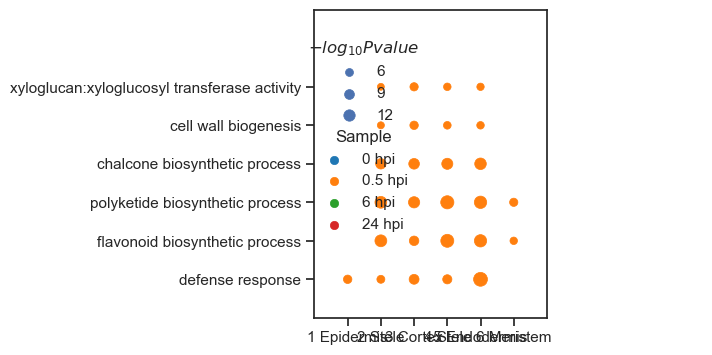

In [ ]:
g = (
    so.Plot(data=_df.reset_index(), x='category', y='Description', pointsize='-log10Pvalue', color='sample')
    .scale(color=singleCellTools.basic.getadataColor(ad, 'Sample_4'), pointsize=so.Continuous(values=(5,10)).tick(at=[3,6,9,12]))
    .add(so.Dot())
    .limit(y=(-1,len(_df['ID'].unique())+1), x=(-1,6))
    .theme({**sns.axes_style('ticks'), 'legend.frameon': False})
    .label(x='',y='', color='Sample', pointsize='$-log_{10}Pvalue$')
    .layout(algo='constrained', size=(3,4))
    .plot()
)
fig = g._figure
fig

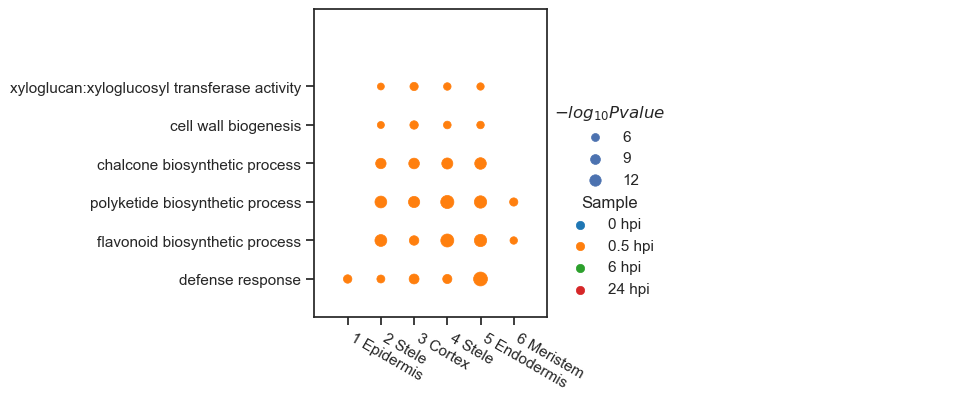

In [ ]:
ax = fig.axes[0]
ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], ha='left', rotation=-30)
leg = fig.legends[0]
leg.set(bbox_to_anchor=(1.8,0.5))
fig

In [ ]:
_df = pd.concat([df_allClusterResponseGoBgCluster.query("ID in @ls_goPlot").assign(type='All induced genes'), df_allClusterResponseGoBgClusterSpec.query("ID in @ls_goPlot").assign(type='Cluster-specific genes')])
_df['category'] = _df['category'].astype(str).astype('category')

In [ ]:
_ls_order = ['defense response',
'defense response to other organism',
 'flavonoid biosynthetic process',
 'polyketide biosynthetic process',
 'chalcone biosynthetic process',
 'cell wall biogenesis',
 'cell wall organization',
 'xyloglucan:xyloglucosyl transferase activity',
 ]

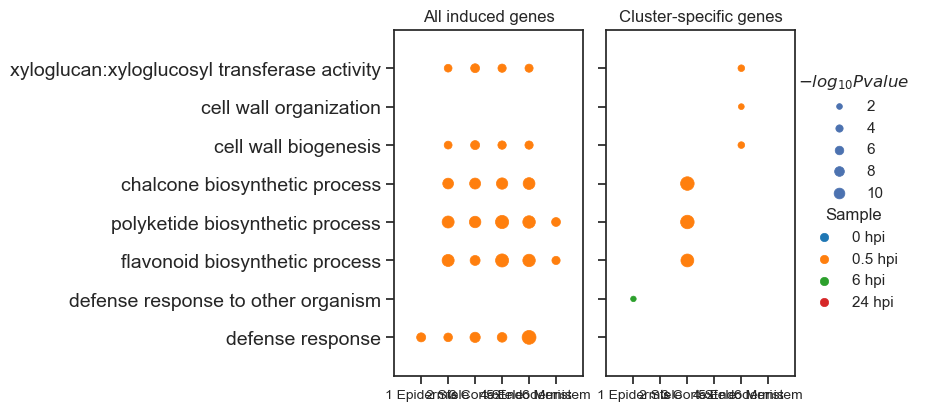

In [ ]:
g = (
    so.Plot(data=_df.sort_values('ID').reset_index(), x='category', y='Description', pointsize='-log10Pvalue', color='sample')
    .facet(col='type')
    .scale(color=singleCellTools.basic.getadataColor(ad, 'Sample_4'), pointsize=so.Continuous(values=(4,10)).tick(every=2, between=(2,10)), y=so.Nominal(order=_ls_order))
    .add(so.Dot())
    .limit(y=(-1,len(_df['ID'].unique())), x=(-1,6))
    .theme({**sns.axes_style('ticks'), 'legend.frameon': False, 'ytick.labelsize': 14, 'xtick.labelsize': 10})
    .label(x='',y='', color='Sample', pointsize='$-log_{10}Pvalue$')
    .layout(algo='constrained', size=(8,4))
    .plot()
)
fig = g._figure
fig

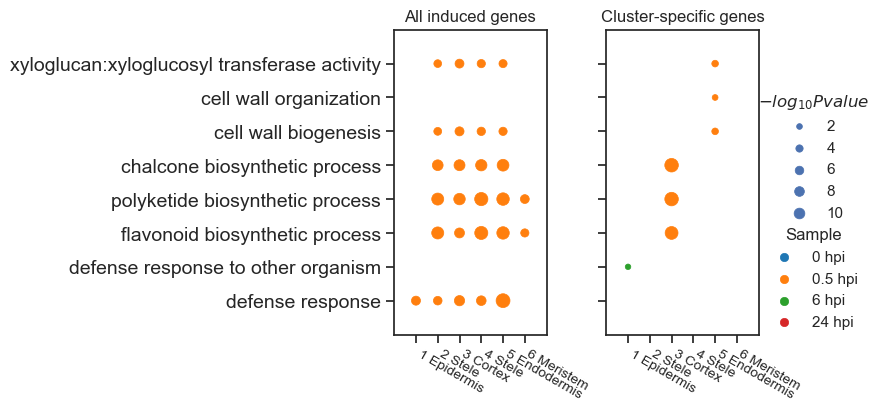

In [ ]:
for ax in fig.axes:
    ax.set_xticklabels([x.get_text() for x in ax.get_xticklabels()], ha='left', rotation=-30)
leg = fig.legends[0]
leg.set(bbox_to_anchor=(0.93,0.5))
fig

In [ ]:
dt_interestedGoTerm = {
    "defense response": "GO:0006952",
    "flavonoid biosynthetic process": "GO:0009813",
    "polyketide biosynthetic process": "GO:0030639",
    "chalcone biosynthetic process": "GO:0009715",
    "cell wall biogenesis": "GO:0042546",
    "xyloglucan metabolic process": "GO:0010411",
    "calcium ion binding": "GO:0005509",
    "calmodulin binding": "GO:0005516",
    "naringenin-chalcone synthase activity": "GO:0016210",
    "xyloglucan:xyloglucosyl transferase activity": "GO:0016762",
    "brassinosteroid homeostasis": "GO:0010268",
    "brassinosteroid biosynthetic process": "GO:0016132",
    "sterol metabolic process": "GO:0016125",
}

In [ ]:
for sample in ls_sample:
    df_sampleClusterResponseGo = df_allClusterResponseGoBgClusterSpec.query("sample == @sample")
    if df_sampleClusterResponseGo.empty:
        print(sample)
        continue
    fig, ax = plt.subplots(figsize=(3, len(df_sampleClusterResponseGo["Description"].unique()) * 0.3))
    sns.scatterplot(
        data=df_sampleClusterResponseGo.sort_values(["Category", "category", "p.adjust"]),
        x="category",
        y="Description",
        size="-log10Pvalue",
        sizes=(10, 200),
        hue="Category",
    )
    handles, labels = ax.get_legend_handles_labels()

    leg = ax.legend(
        loc="lower left",
        bbox_to_anchor=(1, 0),
        frameon=False,
        handles=handles,
        labels=labels,
        title=ax.legend_.get_title().get_text(),
    )

    plt.xticks(ha="left", rotation=-30)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(sample)
    plt.show()

In [ ]:
df_allClusterResponseGoBgClusterSpec.query("sample == '6 hpi' & category == '1 Epidermis'")

In [ ]:
for sample in ls_sample:
    df_sampleClusterResponseGo = df_allClusterResponseGoBgCluster.query("sample == @sample")
    if df_sampleClusterResponseGo.empty:
        print(sample)
        continue
    fig, ax = plt.subplots(figsize=(3, len(df_sampleClusterResponseGo["Description"].unique()) * 0.3))
    sns.scatterplot(
        data=df_sampleClusterResponseGo.sort_values(["Category", "category", "p.adjust"]),
        x="category",
        y="Description",
        size="-log10Pvalue",
        sizes=(10, 200),
        hue="Category",
    )
    handles, labels = ax.get_legend_handles_labels()

    leg = ax.legend(
        loc="lower left",
        bbox_to_anchor=(1, 0),
        frameon=False,
        handles=handles,
        labels=labels,
        title=ax.legend_.get_title().get_text(),
    )

    plt.xticks(ha="left", rotation=-30)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(sample)
    plt.show()

In [ ]:
ls_responseDefense = (
    df_allClusterResponseGoBgCluster.query("sample == '0.5 hpi' & ID == 'GO:0006952'")[
        "geneID"
    ]
    .str.split("/")
    .explode()
    .unique()
)

In [ ]:
ls_responseDefenseBg = df_termGene.query("`GO term accession` == 'GO:0006952' & `Gene stable ID` in @ls_allDetectedGenes")['Gene stable ID'].unique()

In [ ]:
ls_responseDefense6 = (df_allClusterResponseGoBgCluster.query("sample == '6 hpi' & ID == 'GO:0050832'")[
        "geneID"
    ]
    .str.split("/")
    .explode()
    .unique()
)

In [ ]:
ls_responseDefense6Bg = df_termGene.query("`GO term accession` == 'GO:0050832' & `Gene stable ID` in @ls_allDetectedGenes")['Gene stable ID'].unique()

In [ ]:
ls_allDetectedGenes = ad.var.index.to_lista()

# Response Gene

In [ ]:
ad.X = ad.layers['raw'].copy()

In [ ]:
lsDf = []
for cellType, _ad in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if cellType == '9 Unknown':
        continue
    _ad = ad[ad.obs.eval("ct_merged == @cellType")]
    _ad.X = _ad.layers['raw'].A
    for sample in ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']:
        if sample == '0 hpi':
            continue
        df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
            _ad,
            "Sample",
            testName=sample,
            backgroundName='0 hpi'
            category='up'
        )
        df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = cellType, sample=sample)
        lsDf.append(df_diffxpyResult)
    del(_ad)

df_responseGeneVersus0hpi = pd.concat(lsDf)
ad.uns['responseGenesVs0hpi'] = df_responseGeneVersus0hpi
df_responseGeneVersus0hpiUpDegs = df_responseGeneVersus0hpi.query("qval < 0.05 & log2fc > 1").assign(category='Up-regulated genes')

In [ ]:
ad_pseudoBulk = singleCellTools.geneEnrichInfo._mergeData(ad, ['ct_merged', 'Sample_4'])
singleCellTools.basic.initLayer(ad_pseudoBulk, total=1e6, logbase=2)

In [ ]:
ad_pseudoBulkMerge = singleCellTools.geneEnrichInfo._mergeData(ad, ['Sample_4'])
singleCellTools.basic.initLayer(ad_pseudoBulkMerge, total=1e6, logbase=2)

In [ ]:
ad_pseudoBulkEpi = singleCellTools.geneEnrichInfo._mergeData(ad_epi, ['leiden', 'Sample_4'])
singleCellTools.basic.initLayer(ad_pseudoBulkEpi, total=1e6, logbase=2)

In [ ]:
dt_responseGenesVersus0hpiUpDegs = {}
for cluster, _df in df_responseGeneVersus0hpiUpDegs.groupby('cluster'):
    dt_responseGenesVersus0hpiUpDegs[cluster] = _df.groupby('sample')['gene'].agg(list).to_dict()

In [ ]:
_dt_colors = singleCellTools.basic.getadataColor(ad, 'Sample')

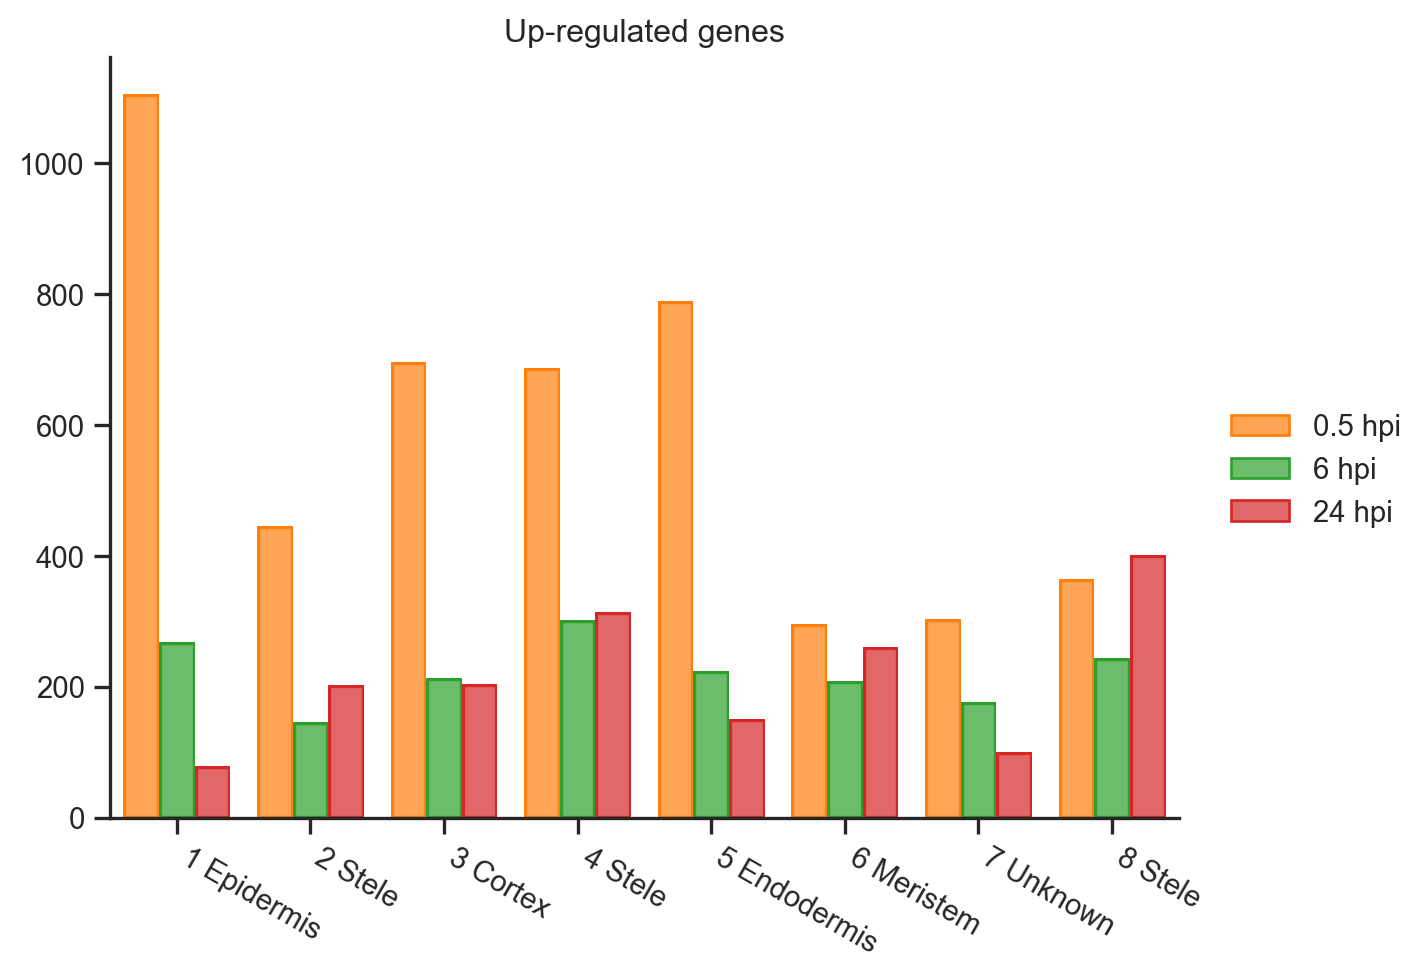

In [ ]:
g = (
    so.Plot(df_responseGeneVersus0hpiUpDegs, x='cluster', color='sample')
    .facet(row='category')
    .add(so.Bar(), so.Count(), so.Dodge())
    .scale(color=_dt_colors)
    .label(color='', x='')
    .theme(dt_snsStyle)
    .plot()
)
g._repr_png_()
ax = g._figure.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha='left')
g

In [ ]:
ls_rhDiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        ad_rh,
        "Sample",
        testName=sample,
        category='up'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_rhDiffxpyRes.append(df_diffxpyResult)

df_rhDiffxpyRes = pd.concat(ls_rhDiffxpyRes)
df_rhDiffxpyResUp = df_rhDiffxpyRes.query("qval < 0.05 & log2fc > 1").assign(category='Up-regulated genes')

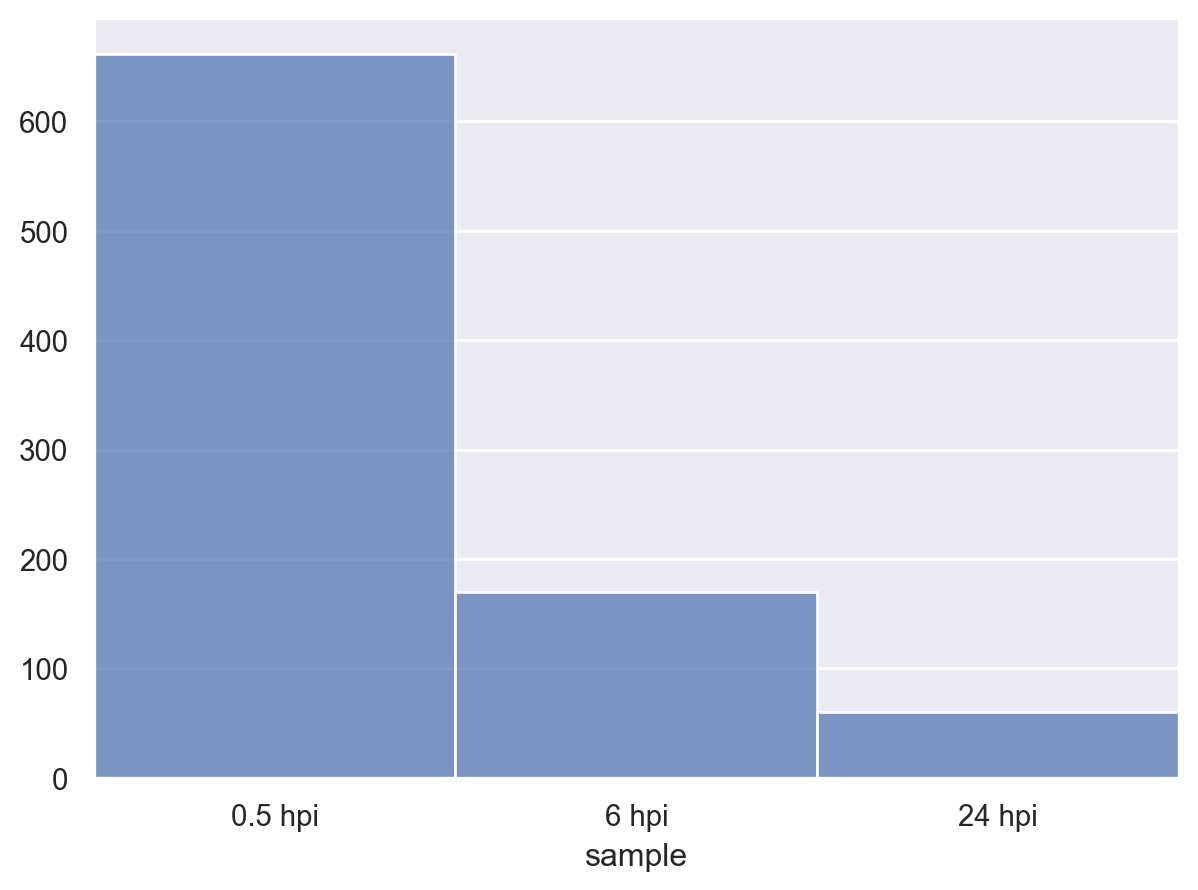

In [ ]:
(
    so.Plot(df_rhDiffxpyResUp, x='sample')
    .add(so.Bars(), so.Count())
)

In [ ]:
dt_responseGenesVersus0hpiUpDegsRh = df_rhDiffxpyResUp.groupby('sample')['gene'].agg(list).to_dict()

In [ ]:
ls_wholeRootDiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        ad,
        "Sample",
        testName=sample,
        category='up'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_wholeRootDiffxpyRes.append(df_diffxpyResult)

df_rootDiffxpyRes = pd.concat(ls_wholeRootDiffxpyRes)
df_rootDiffxpyResUp = df_rootDiffxpyRes.query("qval < 0.05 & log2fc > 1").assign(category='Up-regulated genes')

In [ ]:
dt_responseGenesVersus0hpiUpDegsRoot = df_rootDiffxpyResUp.groupby('sample')['gene'].agg(list).to_dict()

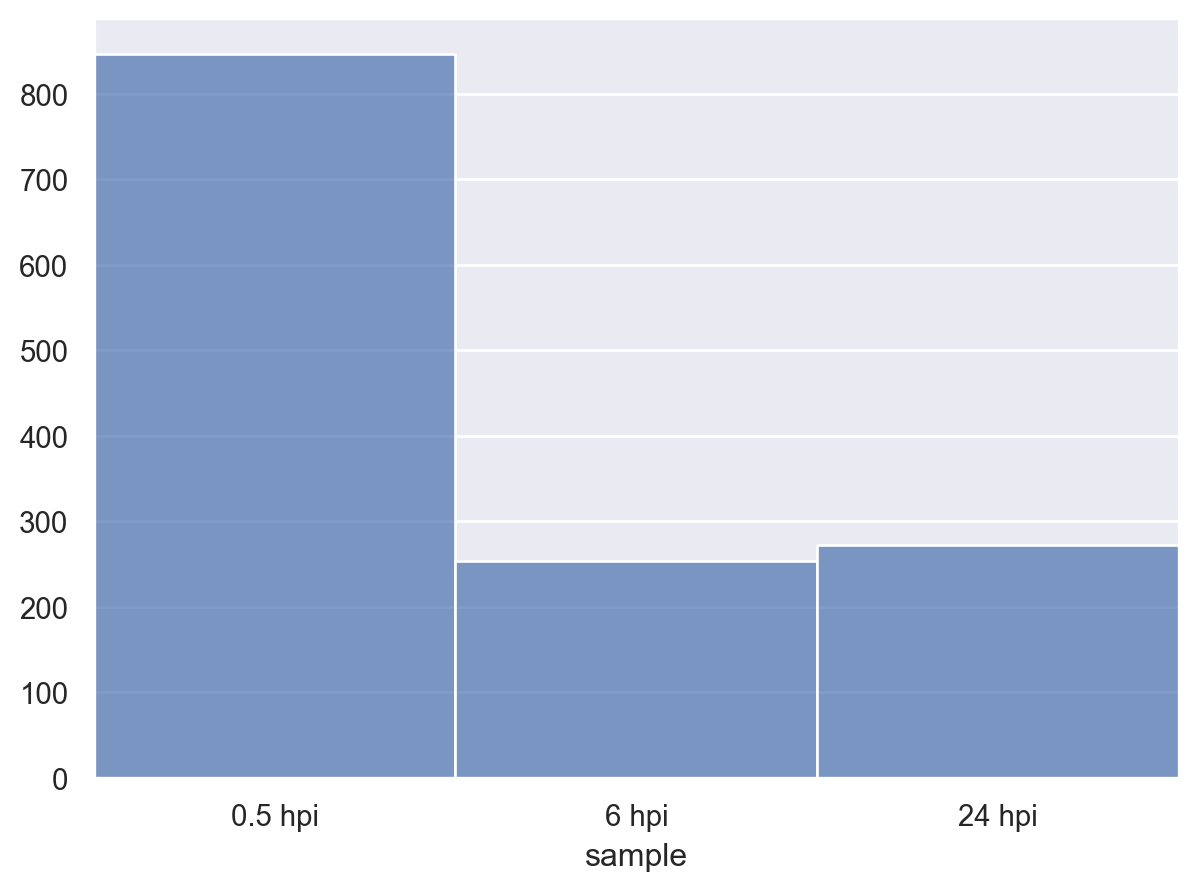

In [ ]:
(
    so.Plot(df_rootDiffxpyResUp, x='sample')
    .add(so.Bars(), so.Count())
)

In [ ]:
dt_responseGenesVersus0hpiUpDegsRh = df_rhDiffxpyResUp.groupby('sample')['gene'].agg(list).to_dict()

In [ ]:
ls_1_1DiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    _ad = ad_epi[ad_epi.obs.leiden_subEpi == '1-0']
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        _ad,
        "Sample",
        testName=sample,
        category='up'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_1_1DiffxpyRes.append(df_diffxpyResult)

df_1_1DiffxpyRes = pd.concat(ls_1_1DiffxpyRes)
df_1_1DiffxpyResUp = df_1_1DiffxpyRes.query("qval < 0.05 & log2fc > 1").assign(category='Up-regulated genes')

In [ ]:
df_1_0DiffxpyResUp = df_1_1DiffxpyResUp

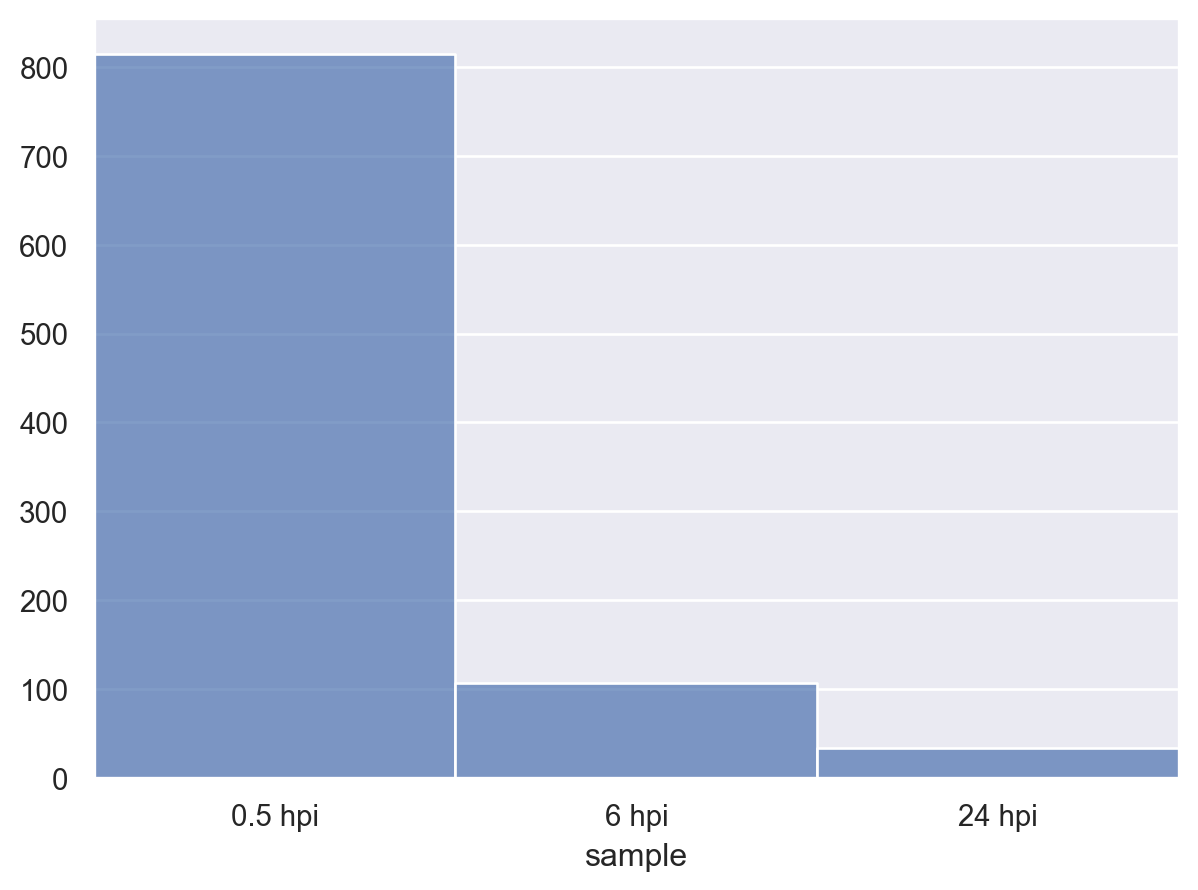

In [ ]:
(
    so.Plot(df_1_1DiffxpyResUp, x='sample')
    .add(so.Bars(), so.Count())
)

# Timepoint Down Gene

In [ ]:
lsDf = []
for cellType, _ad in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if cellType == '9 Unknown':
        continue
    _ad = ad[ad.obs.eval("ct_merged == @cellType")]
    _ad.X = _ad.layers['raw'].A
    for sample in ls_sample:
        df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
            _ad,
            "Sample",
            testName=sample,
            category='down'
        )
        df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = cellType, sample=sample)
        lsDf.append(df_diffxpyResult)
    del(_ad)

df_diffxpyResult = pd.concat(lsDf)

df_diffxpyResult["cluster"] = (
    df_diffxpyResult["cluster"]
    .astype("category")
    .cat.set_categories(
        [
            "1 Epidermis",
            "2 Stele",
            "3 Cortex",
            "4 Stele",
            "5 Endodermis",
            "6 Meristem",
            "7 Unknown",
            "8 Stele",
        ]
    )
)

df_diffxpyResult["sample"] = (
    df_diffxpyResult["sample"].astype("category").cat.set_categories(ls_sample)
)

ad.uns["diffxpy_clusterResponse"] = df_diffxpyResult


In [ ]:
df_diffxpyResult = ad.uns["diffxpy_clusterResponse"]
df_diffxpyResult = df_diffxpyResult.query("qval < 0.05 & log2fc < -1")

_dt = {'Mock': '0 hpi'}
ls_sample = ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']
df_diffxpyResult = df_diffxpyResult.assign(sample = lambda df:df['sample'].map(lambda x:_dt.get(x,x))).assign(Sample_4 = lambda df:df['sample'].astype('category').cat.set_categories(ls_sample), cluster = lambda df:df['cluster'].astype('category'))

In [ ]:
# df_diffxpyResult.to_excel(f"{dir_result}/timeSpecDownGenex.xlsx", index=False)

In [ ]:
# df_diffxpyResult.to_excel(f"{dir_result}/diffxpy_response_all.xlsx")

In [ ]:
df_responseGeneCounts = df_diffxpyResult.value_counts(['cluster', 'Sample_4']).rename('counts').reset_index()

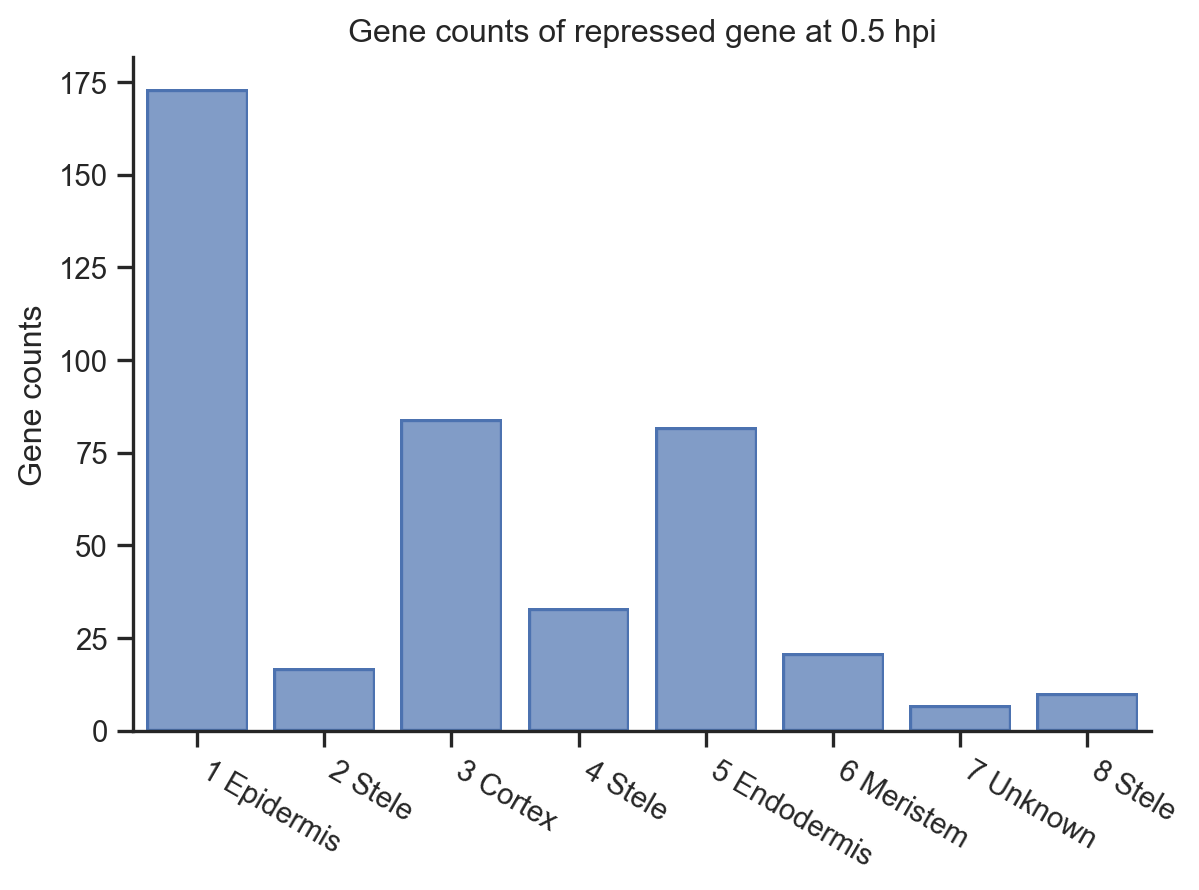

In [ ]:
g = (
    so.Plot(df_diffxpyResult.query("sample == '0.5 hpi'").assign(count=lambda df:df.groupby('cluster')['gene'].transform('count')), x='cluster', y='count')
    .add(so.Bar(), so.Count())
    .add(so.Text(), so.Count())
    .theme(dt_snsStyle)
    .label(x='', y='Gene counts', title='Gene counts of repressed gene at 0.5 hpi')
    .plot()
)
g._repr_png_()
ax = g._figure.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha='left')
g

# Response Down Gene

In [ ]:
lsDf = []
for cellType, _ad in singleCellTools.basic.splitAdata(ad, 'ct_merged', needName=True):
    if cellType == '9 Unknown':
        continue
    _ad = ad[ad.obs.eval("ct_merged == @cellType")]
    _ad.X = _ad.layers['raw'].A
    for sample in ['0 hpi', '0.5 hpi', '6 hpi', '24 hpi']:
        if sample == '0 hpi':
            continue
        df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
            _ad,
            "Sample",
            testName=sample,
            backgroundName='0 hpi'
            category='down'
        )
        df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = cellType, sample=sample)
        lsDf.append(df_diffxpyResult)
    del(_ad)

df_responseGeneVersus0hpi = pd.concat(lsDf)
ad.uns['responseGenesVs0hpi'] = df_responseGeneVersus0hpi
df_responseGeneVersus0hpiDownDegs = df_responseGeneVersus0hpi.query("qval < 0.05 & log2fc < -1").assign(category='Down-regulated genes')

In [ ]:
dt_responseGenesVersus0hpiDownDegs = {}
for cluster, _df in df_responseGeneVersus0hpiDownDegs.groupby('cluster'):
    dt_responseGenesVersus0hpiDownDegs[cluster] = _df.groupby('sample')['gene'].agg(list).to_dict()

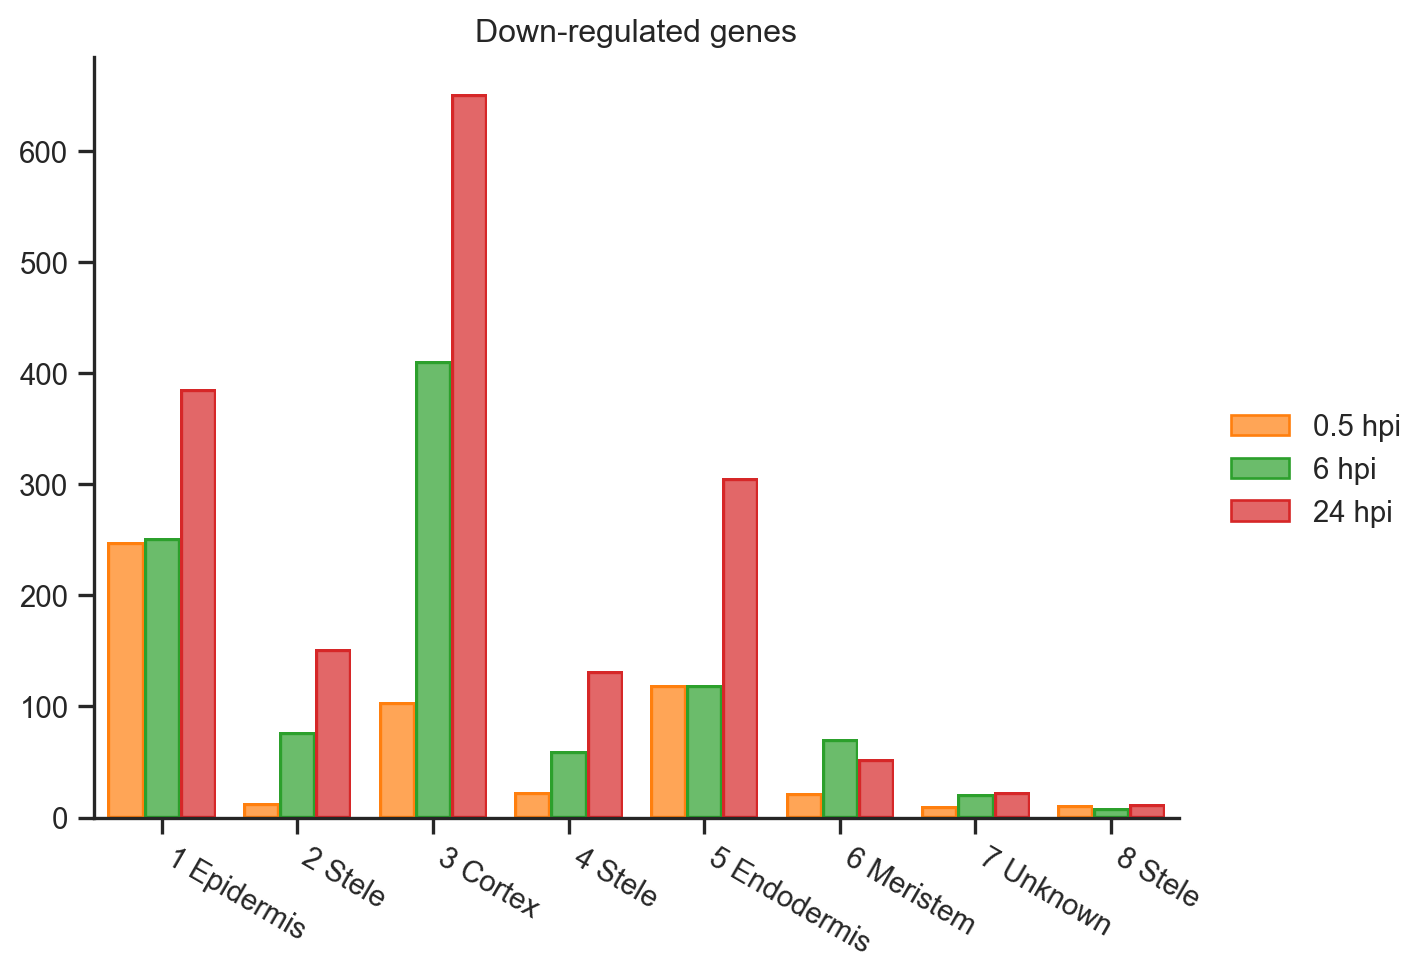

In [ ]:
g = (
    so.Plot(df_responseGeneVersus0hpiDownDegs, x='cluster', color='sample')
    .facet(row='category')
    .add(so.Bar(), so.Count(), so.Dodge())
    .scale(color=_dt_colors)
    .label(color='', x='')
    .theme(dt_snsStyle)
    .plot()
)
g._repr_png_()
ax = g._figure.axes[0]
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30, ha='left')
g

In [ ]:
df_responseGeneVersus0hpi = pd.concat([df_responseGeneVersus0hpiDownDegs, df_responseGeneVersus0hpiUpDegs])

In [ ]:
ls_rhDiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        ad_rh,
        "Sample",
        testName=sample,
        category='down'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_rhDiffxpyRes.append(df_diffxpyResult)

df_rhDiffxpyRes = pd.concat(ls_rhDiffxpyRes)
df_rhDiffxpyResDown = df_rhDiffxpyRes.query("qval < 0.05 & log2fc < -1").assign(category='Down-regulated genes')

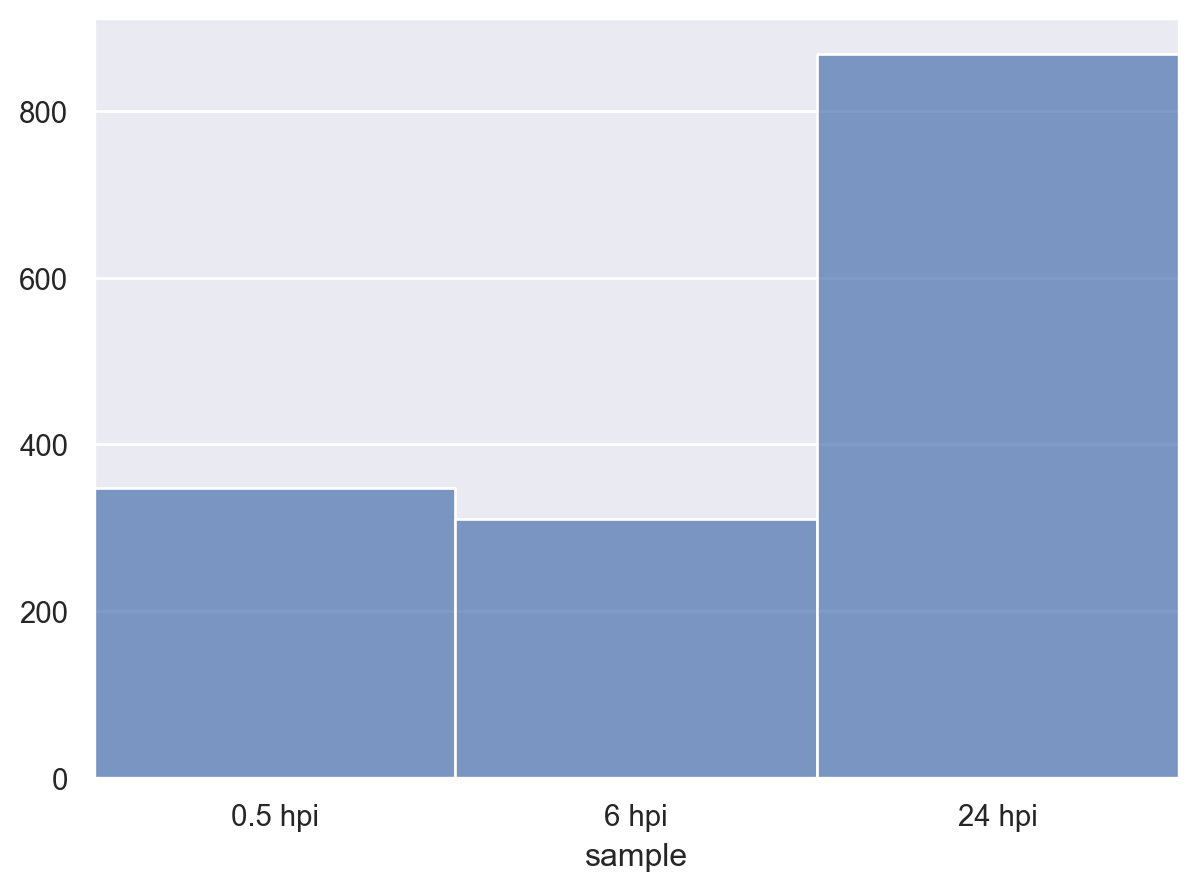

In [ ]:
(
    so.Plot(df_rhDiffxpyResDown, x='sample')
    .add(so.Bars(), so.Count())
)

In [ ]:
dt_responseGenesVersus0hpiDownDegsRh = df_rhDiffxpyResDown.groupby('sample')['gene'].agg(list).to_dict()

In [ ]:
ls_wholeRootDiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        ad,
        "Sample",
        testName=sample,
        category='down'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_wholeRootDiffxpyRes.append(df_diffxpyResult)

df_rootDiffxpyRes = pd.concat(ls_wholeRootDiffxpyRes)
df_rootDiffxpyResDown = df_rootDiffxpyRes.query("qval < 0.05 & log2fc < -1").assign(category='Down-regulated genes')

In [ ]:
dt_responseGenesVersus0hpiUpDegsRoot = df_rootDiffxpyResUp.groupby('sample')['gene'].agg(list).to_dict()

In [ ]:
dt_responseGenesVersus0hpiDownDegsRoot = df_rootDiffxpyResDown.groupby('sample')['gene'].agg(list).to_dict()

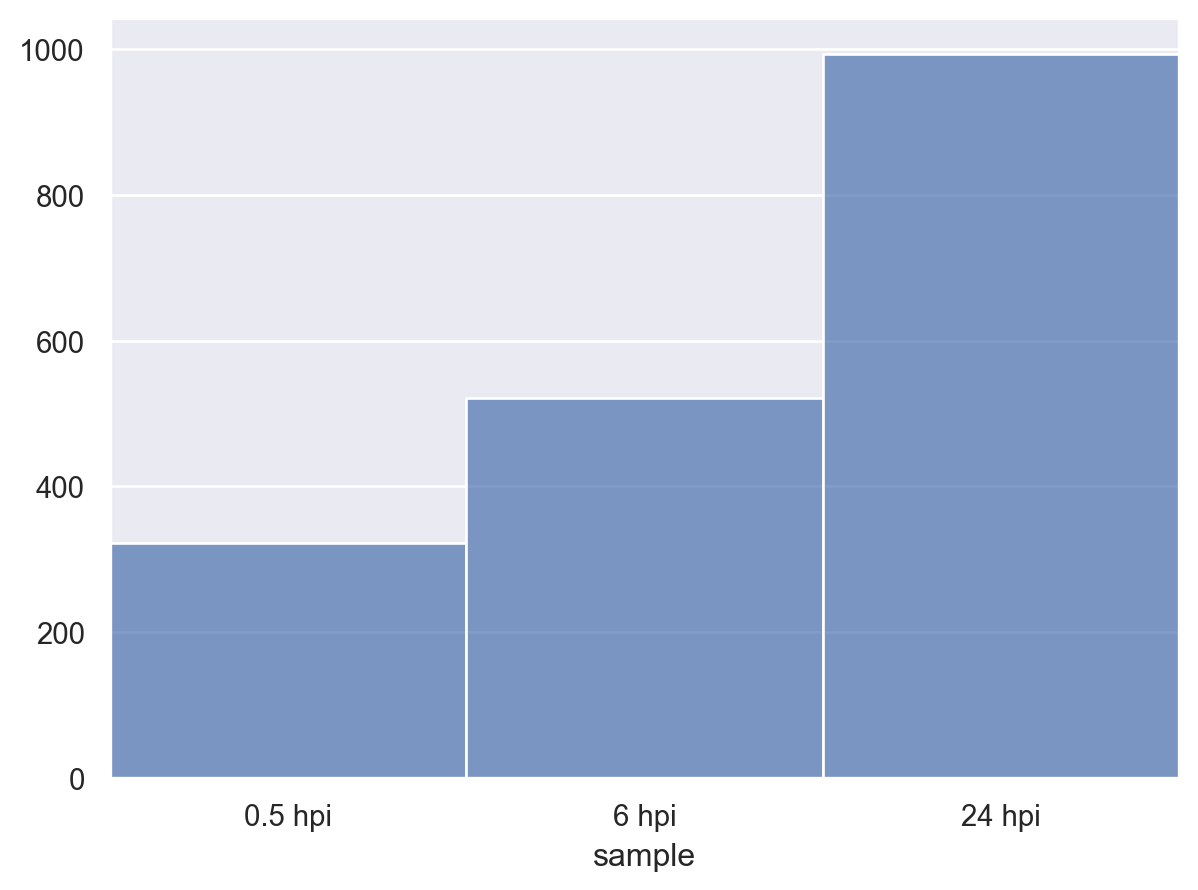

In [ ]:
(
    so.Plot(df_rootDiffxpyResDown, x='sample')
    .add(so.Bars(), so.Count())
)

In [ ]:
ls_1_1DiffxpyRes = []
for sample in ['0.5 hpi', '6 hpi', '24 hpi']:
    _ad = ad_epi[ad_epi.obs.leiden_subEpi == '1-0']
    df_diffxpyResult = singleCellTools.geneEnrichInfo.useDiffxpyFindDegs(
        _ad,
        "Sample",
        testName=sample,
        category='down'
    )
    df_diffxpyResult = df_diffxpyResult.summary().assign(cluster = 'Root hair', sample=sample)
    ls_1_1DiffxpyRes.append(df_diffxpyResult)

df_1_1DiffxpyRes = pd.concat(ls_1_1DiffxpyRes)
df_1_1DiffxpyResDown = df_1_1DiffxpyRes.query("qval < 0.05 & log2fc < -1").assign(category='Down-regulated genes')

In [ ]:
df_1_0DiffxpyResDown = df_1_1DiffxpyResDown

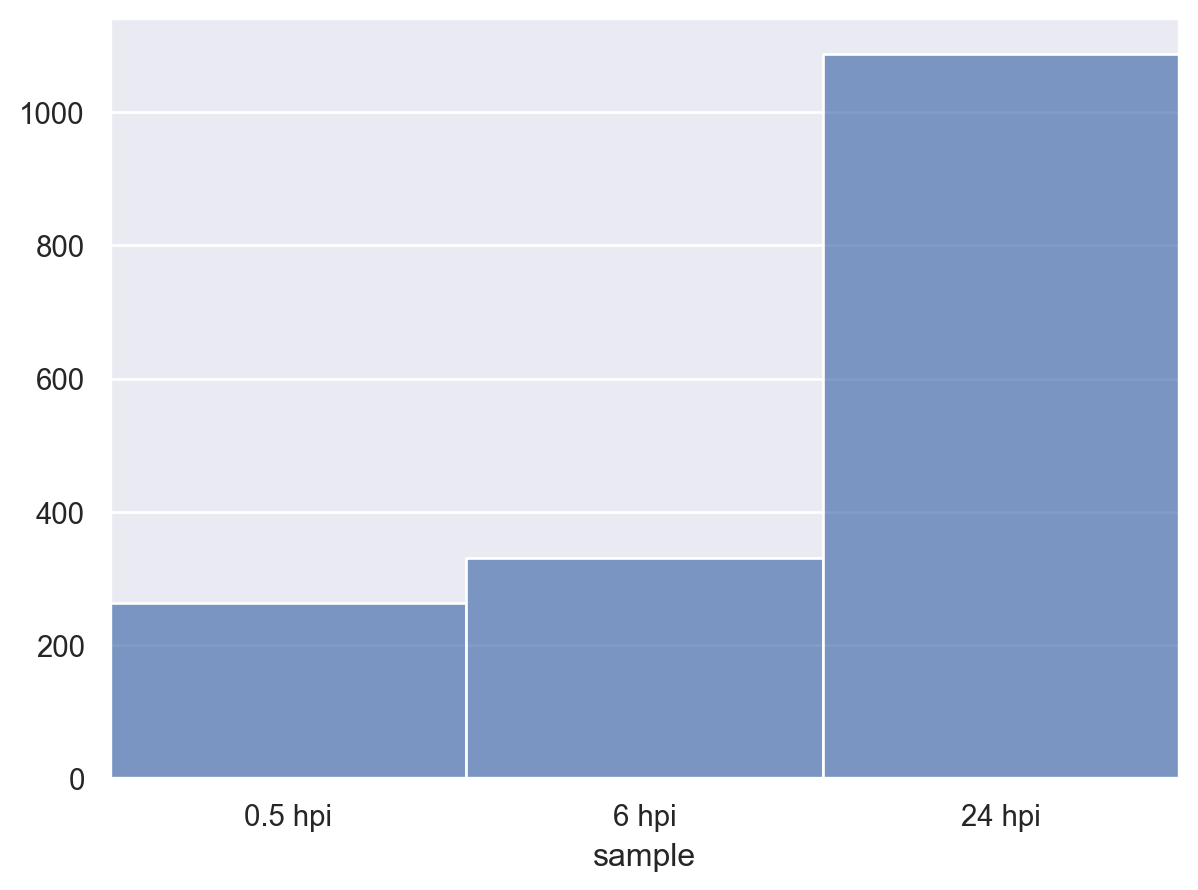

In [ ]:
(
    so.Plot(df_1_1DiffxpyResDown, x='sample')
    .add(so.Bars(), so.Count())
)